<a href="https://colab.research.google.com/github/EnyuY/IAGs-in-SKCM/blob/main/IAG_ML_20SIG_135year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning pipeline

**Machine learning modeling and prognostic value analysis of invasion-related genes in cutaneous melanoma**

**Authors**: Enyu Yang, Qianyun Ding, Xiaowei Fan, Haihan Ye, Cheng Xuan, Shuo Zhao, Qing Ji, Weihua Yu, Yongfu Liu, Jun Cao📧 , Meiyu Fang📧  <a href="https://orcid.org/0000-0001-9369-3640" target="_blank"><img alt="ORCID logo" src="https://info.orcid.org/wp-content/uploads/2019/11/orcid_16x16.png"></a>, Xianfeng Ding📧 <a href="https://orcid.org/0000-0003-1119-3816" target="_blank"><img alt="ORCID logo" src="https://info.orcid.org/wp-content/uploads/2019/11/orcid_16x16.png"></a>

**Machine learning pipeline**: 
We constructed a machine learning pipeline using Python (version 3.10.11) and PyCaret (version 3.0.0) in the TCGA-SKCM database. The dataset underwent preprocessing, employing the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance. The selected features were normalized using the MinMaxScaler from scikit-learn (version 1.2.2). Model development incorporated features such as age, gender, T stage, N stage, M stage, and the expression levels of 20 invasion-associated genes. A trainset and testset ratio of 7:3 was used, and stratified ten-fold cross-validation was performed to assess the model's performance and robustness. We compared the performance of 15 classification algorithms to identify the optimal model for predicting SKCM patient prognosis. The machine learning pipeline was implemented in open-source Python code, and [interactive Google Colab notebooks](https://colab.research.google.com/drive/1PqikmkMxX1vdBiRFSEuL2ALBnTQL4gaF?usp=sharing) are available at https://github.com/EnyuY/IAGs-in-SKCM.

In [ ]:
#@title install dependencies

import sys
print('python.version')
print(sys.version)

try:
    import pycaret
except ImportError:
    !pip install pycaret
    import pycaret
print('pycaret.version')
print(pycaret.__version__)
from pycaret.classification import *

import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,label_binarize

python.version
3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
pycaret.version
3.0.0


## Setup TCGA-SKCM

In [ ]:
#@title Data upload (TCGA-SKCM)
data = {
    'ID': ['TCGA-3N-A9WD-06', 'TCGA-BF-A1PU-01', 'TCGA-BF-A1PV-01', 'TCGA-BF-A1PX-01', 'TCGA-BF-A1PZ-01', 'TCGA-BF-A1Q0-01', 'TCGA-BF-A3DJ-01', 'TCGA-BF-A3DL-01', 'TCGA-BF-A3DM-01', 'TCGA-BF-A3DN-01', 'TCGA-BF-A5EO-01', 'TCGA-BF-A5EP-01', 'TCGA-BF-A5EQ-01', 'TCGA-BF-A5ER-01', 'TCGA-BF-A5ES-01', 'TCGA-BF-A9VF-01', 'TCGA-BF-AAOU-01', 'TCGA-BF-AAOX-01', 'TCGA-BF-AAP1-01', 'TCGA-BF-AAP2-01', 'TCGA-BF-AAP4-01', 'TCGA-BF-AAP6-01', 'TCGA-BF-AAP7-01', 'TCGA-BF-AAP8-01', 'TCGA-D3-A1Q1-06', 'TCGA-D3-A1Q3-06', 'TCGA-D3-A1Q4-06', 'TCGA-D3-A1Q6-06', 'TCGA-D3-A1Q7-06', 'TCGA-D3-A1Q8-06', 'TCGA-D3-A1Q9-06', 'TCGA-D3-A1QA-06', 'TCGA-D3-A1QA-07', 'TCGA-D3-A1QB-06', 'TCGA-D3-A2J6-06', 'TCGA-D3-A2J7-06', 'TCGA-D3-A2J8-06', 'TCGA-D3-A2J9-06', 'TCGA-D3-A2JA-06', 'TCGA-D3-A2JC-06', 'TCGA-D3-A2JD-06', 'TCGA-D3-A2JF-06', 'TCGA-D3-A2JG-06', 'TCGA-D3-A2JH-06', 'TCGA-D3-A2JK-06', 'TCGA-D3-A2JN-06', 'TCGA-D3-A2JP-06', 'TCGA-D3-A3BZ-06', 'TCGA-D3-A3C6-06', 'TCGA-D3-A3C7-06', 'TCGA-D3-A3CB-06', 'TCGA-D3-A3CC-06', 'TCGA-D3-A3CE-06', 'TCGA-D3-A3CF-06', 'TCGA-D3-A3ML-06', 'TCGA-D3-A3MR-06', 'TCGA-D3-A3MU-06', 'TCGA-D3-A3MV-06', 'TCGA-D3-A51E-06', 'TCGA-D3-A51F-06', 'TCGA-D3-A51H-06', 'TCGA-D3-A51J-06', 'TCGA-D3-A51N-06', 'TCGA-D3-A51R-06', 'TCGA-D3-A51T-06', 'TCGA-D3-A5GL-06', 'TCGA-D3-A5GN-06', 'TCGA-D3-A5GO-06', 'TCGA-D3-A5GR-06', 'TCGA-D3-A5GS-06', 'TCGA-D3-A5GT-01', 'TCGA-D3-A5GU-06', 'TCGA-D3-A8GB-06', 'TCGA-D3-A8GD-06', 'TCGA-D3-A8GI-06', 'TCGA-D3-A8GJ-06', 'TCGA-D3-A8GK-06', 'TCGA-D3-A8GL-06', 'TCGA-D3-A8GM-06', 'TCGA-D3-A8GP-06', 'TCGA-D3-A8GQ-06', 'TCGA-D3-A8GS-06', 'TCGA-D9-A1JW-06', 'TCGA-D9-A3Z1-06', 'TCGA-D9-A3Z3-06', 'TCGA-D9-A3Z4-01', 'TCGA-D9-A4Z2-01', 'TCGA-D9-A4Z3-01', 'TCGA-D9-A4Z5-01', 'TCGA-D9-A4Z6-06', 'TCGA-D9-A6E9-06', 'TCGA-D9-A6EA-06', 'TCGA-D9-A6EC-06', 'TCGA-D9-A6EG-06', 'TCGA-DA-A1HV-06', 'TCGA-DA-A1HW-06', 'TCGA-DA-A1HY-06', 'TCGA-DA-A1I0-06', 'TCGA-DA-A1I1-06', 'TCGA-DA-A1I2-06', 'TCGA-DA-A1I4-06', 'TCGA-DA-A1I5-06', 'TCGA-DA-A1I7-06', 'TCGA-DA-A1I8-06', 'TCGA-DA-A1IA-06', 'TCGA-DA-A1IB-06', 'TCGA-DA-A1IC-06', 'TCGA-DA-A3F2-06', 'TCGA-DA-A3F3-06', 'TCGA-DA-A3F5-06', 'TCGA-DA-A3F8-06', 'TCGA-DA-A95X-06', 'TCGA-DA-A95Y-06', 'TCGA-DA-A960-01', 'TCGA-EB-A1NK-01', 'TCGA-EB-A24D-01', 'TCGA-EB-A299-01', 'TCGA-EB-A3HV-01', 'TCGA-EB-A3XC-01', 'TCGA-EB-A3XE-01', 'TCGA-EB-A3XF-01', 'TCGA-EB-A3Y6-01', 'TCGA-EB-A3Y7-01', 'TCGA-EB-A41B-01', 'TCGA-EB-A42Y-01', 'TCGA-EB-A42Z-01', 'TCGA-EB-A431-01', 'TCGA-EB-A44N-01', 'TCGA-EB-A44O-01', 'TCGA-EB-A44P-01', 'TCGA-EB-A4IQ-01', 'TCGA-EB-A4OY-01', 'TCGA-EB-A4OZ-01', 'TCGA-EB-A4P0-01', 'TCGA-EB-A551-01', 'TCGA-EB-A553-01', 'TCGA-EB-A57M-01', 'TCGA-EB-A5KH-06', 'TCGA-EB-A5SH-06', 'TCGA-EB-A5UM-01', 'TCGA-EB-A5VU-01', 'TCGA-EB-A5VV-06', 'TCGA-EB-A6QY-01', 'TCGA-EB-A6QZ-01', 'TCGA-EB-A6R0-01', 'TCGA-EB-A82B-01', 'TCGA-EB-A82C-01', 'TCGA-EB-A85I-01', 'TCGA-EB-A85J-01', 'TCGA-EB-A97M-01', 'TCGA-EE-A17X-06', 'TCGA-EE-A17Y-06', 'TCGA-EE-A17Z-06', 'TCGA-EE-A180-06', 'TCGA-EE-A181-06', 'TCGA-EE-A182-06', 'TCGA-EE-A184-06', 'TCGA-EE-A185-06', 'TCGA-EE-A20B-06', 'TCGA-EE-A20F-06', 'TCGA-EE-A20H-06', 'TCGA-EE-A29A-06', 'TCGA-EE-A29B-06', 'TCGA-EE-A29C-06', 'TCGA-EE-A29D-06', 'TCGA-EE-A29E-06', 'TCGA-EE-A29G-06', 'TCGA-EE-A29H-06', 'TCGA-EE-A29L-06', 'TCGA-EE-A29M-06', 'TCGA-EE-A29P-06', 'TCGA-EE-A29Q-06', 'TCGA-EE-A29R-06', 'TCGA-EE-A29S-06', 'TCGA-EE-A29V-06', 'TCGA-EE-A29X-06', 'TCGA-EE-A2A0-06', 'TCGA-EE-A2A1-06', 'TCGA-EE-A2A2-06', 'TCGA-EE-A2A5-06', 'TCGA-EE-A2A6-06', 'TCGA-EE-A2GB-06', 'TCGA-EE-A2GC-06', 'TCGA-EE-A2GD-06', 'TCGA-EE-A2GE-06', 'TCGA-EE-A2GH-06', 'TCGA-EE-A2GI-06', 'TCGA-EE-A2GJ-06', 'TCGA-EE-A2GK-06', 'TCGA-EE-A2GL-06', 'TCGA-EE-A2GM-06', 'TCGA-EE-A2GN-06', 'TCGA-EE-A2GO-06', 'TCGA-EE-A2GP-06', 'TCGA-EE-A2GR-06', 'TCGA-EE-A2GS-06', 'TCGA-EE-A2GT-06', 'TCGA-EE-A2GU-06', 'TCGA-EE-A2M5-06', 'TCGA-EE-A2M6-06', 'TCGA-EE-A2M7-06', 'TCGA-EE-A2M8-06', 'TCGA-EE-A2MC-06', 'TCGA-EE-A2MD-06', 'TCGA-EE-A2ME-06', 'TCGA-EE-A2MF-06', 'TCGA-EE-A2MG-06', 'TCGA-EE-A2MH-06', 'TCGA-EE-A2MI-06', 'TCGA-EE-A2MJ-06', 'TCGA-EE-A2MK-06', 'TCGA-EE-A2ML-06', 'TCGA-EE-A2MM-06', 'TCGA-EE-A2MN-06', 'TCGA-EE-A2MP-06', 'TCGA-EE-A2MQ-06', 'TCGA-EE-A2MR-06', 'TCGA-EE-A2MS-06', 'TCGA-EE-A2MT-06', 'TCGA-EE-A2MU-06', 'TCGA-EE-A3AA-06', 'TCGA-EE-A3AB-06', 'TCGA-EE-A3AC-06', 'TCGA-EE-A3AD-06', 'TCGA-EE-A3AF-06', 'TCGA-EE-A3AG-06', 'TCGA-EE-A3AH-06', 'TCGA-EE-A3J3-06', 'TCGA-EE-A3J4-06', 'TCGA-EE-A3J5-06', 'TCGA-EE-A3J7-06', 'TCGA-EE-A3J8-06', 'TCGA-EE-A3JA-06', 'TCGA-EE-A3JB-06', 'TCGA-EE-A3JE-06', 'TCGA-EE-A3JH-06', 'TCGA-EE-A3JI-06', 'TCGA-ER-A193-06', 'TCGA-ER-A196-01', 'TCGA-ER-A197-06', 'TCGA-ER-A199-06', 'TCGA-ER-A19D-06', 'TCGA-ER-A19E-06', 'TCGA-ER-A19K-01', 'TCGA-ER-A19M-06', 'TCGA-ER-A19T-01', 'TCGA-ER-A19T-06', 'TCGA-ER-A2NB-01', 'TCGA-ER-A2NC-06', 'TCGA-ER-A2ND-06', 'TCGA-ER-A2NF-01', 'TCGA-ER-A2NF-06', 'TCGA-ER-A2NG-06', 'TCGA-ER-A2NH-06', 'TCGA-ER-A3ET-06', 'TCGA-ER-A3EV-06', 'TCGA-ER-A3PL-06', 'TCGA-ER-A42K-06', 'TCGA-ER-A42L-06', 'TCGA-FR-A2OS-01', 'TCGA-FR-A3R1-01', 'TCGA-FR-A3YN-06', 'TCGA-FR-A44A-06', 'TCGA-FR-A728-01', 'TCGA-FR-A729-06', 'TCGA-FR-A7U9-06', 'TCGA-FR-A7UA-06', 'TCGA-FR-A8YC-06', 'TCGA-FR-A8YD-06', 'TCGA-FR-A8YE-06', 'TCGA-FS-A1YW-06', 'TCGA-FS-A1YX-06', 'TCGA-FS-A1YY-06', 'TCGA-FS-A1Z0-06', 'TCGA-FS-A1Z4-06', 'TCGA-FS-A1Z7-06', 'TCGA-FS-A1ZA-06', 'TCGA-FS-A1ZB-06', 'TCGA-FS-A1ZD-06', 'TCGA-FS-A1ZE-06', 'TCGA-FS-A1ZF-06', 'TCGA-FS-A1ZG-06', 'TCGA-FS-A1ZH-06', 'TCGA-FS-A1ZJ-06', 'TCGA-FS-A1ZK-06', 'TCGA-FS-A1ZM-06', 'TCGA-FS-A1ZN-01', 'TCGA-FS-A1ZP-06', 'TCGA-FS-A1ZR-06', 'TCGA-FS-A1ZS-06', 'TCGA-FS-A1ZT-06', 'TCGA-FS-A1ZU-06', 'TCGA-FS-A1ZW-06', 'TCGA-FS-A1ZY-06', 'TCGA-FS-A1ZZ-06', 'TCGA-FS-A4F0-06', 'TCGA-FS-A4F2-06', 'TCGA-FS-A4F4-06', 'TCGA-FS-A4F5-06', 'TCGA-FS-A4F8-06', 'TCGA-FS-A4F9-06', 'TCGA-FS-A4FB-06', 'TCGA-FS-A4FC-06', 'TCGA-FS-A4FD-06', 'TCGA-FW-A3TV-06', 'TCGA-GF-A2C7-01', 'TCGA-GF-A3OT-06', 'TCGA-GF-A4EO-06', 'TCGA-GN-A263-01', 'TCGA-GN-A267-06', 'TCGA-GN-A268-06', 'TCGA-GN-A26A-06', 'TCGA-GN-A26C-01', 'TCGA-GN-A4U3-06', 'TCGA-GN-A4U7-06', 'TCGA-GN-A4U9-06', 'TCGA-HR-A2OH-06', 'TCGA-IH-A3EA-01', 'TCGA-QB-A6FS-06', 'TCGA-W3-A824-06', 'TCGA-W3-A825-06', 'TCGA-W3-A828-06', 'TCGA-W3-AA1R-06', 'TCGA-W3-AA1V-06', 'TCGA-W3-AA1W-06', 'TCGA-W3-AA21-06', 'TCGA-WE-A8JZ-06', 'TCGA-WE-A8K1-06', 'TCGA-WE-A8K5-06', 'TCGA-WE-A8ZO-06', 'TCGA-WE-A8ZQ-06', 'TCGA-WE-A8ZR-06', 'TCGA-WE-A8ZT-06', 'TCGA-WE-AA9Y-06', 'TCGA-WE-AAA0-06', 'TCGA-WE-AAA3-06', 'TCGA-XV-A9W2-01', 'TCGA-XV-A9W5-01', 'TCGA-XV-AAZV-01', 'TCGA-XV-AAZW-01', 'TCGA-XV-AAZY-01', 'TCGA-YG-AA3N-01', 'TCGA-YG-AA3P-06', 'TCGA-Z2-A8RT-06', 'TCGA-Z2-AA3S-06', 'TCGA-Z2-AA3V-06'],
    'group': ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor'],
    'age': [82, 46, 74, 56, 71, 80, 36, 84, 63, 81, 65, 75, 63, 63, 76, 77, 73, 83, 86, 62, 61, 55, 76, 58, 79, 64, 53, 55, 42, 33, 72, 55, 55, 75, 65, 67, 48, 75, 68, 53, 58, 74, 30, 68, 24, 46, 37, 63, 54, 57, 39, 69, 74, 61, 70, 42, 53, 38, 39, 51, 60, 19, 56, 60, 59, 74, 15, 61, 23, 58, 43, 36, 48, 63, 68, 18, 45, 43, 73, 77, 66, 52, 82, 66, 39, 54, 50, 73, 68, 54, 75, 70, 56, 56, 75, 37, 42, 63, 55, 45, 51, 27, 62, 63, 32, 69, 81, 55, 52, 45, 39, 62, 68, 73, 48, 72, 63, 37, 74, 77, 57, 56, 86, 76, 73, 49, 34, 59, 69, 58, 42, 65, 41, 82, 78, 62, 56, 55, 60, 48, 56, 74, 71, 76, 58, 58, 70, 66, 66, 66, 54, 69, 57, 69, 82, 84, 72, 55, 66, 53, 56, 68, 67, 20, 87, 54, 53, 59, 78, 33, 73, 70, 48, 79, 85, 58, 77, 46, 71, 43, 43, 51, 82, 58, 44, 34, 39, 83, 46, 40, 70, 67, 66, 80, 78, 28, 77, 65, 49, 61, 66, 54, 73, 52, 51, 39, 23, 66, 43, 60, 18, 35, 63, 58, 34, 70, 61, 72, 45, 71, 47, 30, 47, 50, 48, 25, 30, 42, 72, 71, 43, 59, 44, 60, 75, 54, 48, 62, 64, 83, 86, 46, 36, 79, 36, 51, 51, 57, 50, 57, 53, 53, 43, 49, 64, 55, 30, 40, 49, 49, 69, 44, 29, 54, 38, 63, 65, 78, 56, 41, 52, 39, 55, 32, 62, 19, 45, 57, 63, 40, 78, 60, 71, 75, 68, 74, 43, 52, 36, 54, 55, 70, 65, 71, 54, 67, 46, 64, 77, 52, 80, 46, 75, 39, 57, 48, 58, 74, 24, 38, 83, 63, 77, 30, 56, 71, 46, 61, 49, 63, 60, 66, 71, 63, 64, 26, 70, 74, 65, 73, 48, 49, 25, 37, 47, 84, 81, 51, 56, 62, 76, 67, 63, 42, 58, 57],
    'gender': ['male', 'female', 'female', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'female'],
    'M': ['M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M1', 'M1', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M1', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0', 'M0'],
    'N': ['N1', 'N0', 'N0', 'N2', 'N0', 'N0', 'N1', 'N2', 'N0', 'N3', 'N0', 'N3', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N2', 'N0', 'N0', 'N3', 'N0', 'N1', 'N1', 'N0', 'N3', 'N2', 'N0', 'N0', 'N2', 'N0', 'N1', 'N0', 'N3', 'N1', 'N2', 'N1', 'N0', 'N1', 'N0', 'N2', 'N1', 'N3', 'N0', 'N0', 'N1', 'N0', 'N0', 'N1', 'N3', 'N2', 'N1', 'N2', 'N2', 'N0', 'N1', 'N3', 'N1', 'N3', 'N0', 'N1', 'N0', 'N0', 'N0', 'N1', 'N1', 'N3', 'N0', 'N1', 'N3', 'N0', 'N0', 'N0', 'N1', 'N0', 'N2', 'N0', 'N0', 'N2', 'N3', 'N1', 'N3', 'N3', 'N1', 'N0', 'N1', 'N1', 'N3', 'N1', 'N1', 'N2', 'N1', 'N1', 'N3', 'N2', 'N2', 'N2', 'N0', 'N2', 'N0', 'N1', 'N2', 'N2', 'N2', 'N2', 'N0', 'N2', 'N0', 'N0', 'N0', 'N0', 'N2', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N2', 'N0', 'N0', 'N1', 'N0', 'N0', 'N0', 'N0', 'N1', 'N1', 'N3', 'N0', 'N2', 'N0', 'N1', 'N1', 'N0', 'N0', 'N1', 'N1', 'N0', 'N0', 'N0', 'N2', 'N0', 'N0', 'N0', 'N0', 'N0', 'N1', 'N0', 'N0', 'N0', 'N1', 'N0', 'N3', 'N0', 'N0', 'N0', 'N1', 'N0', 'N0', 'N1', 'N1', 'N2', 'N0', 'N3', 'N0', 'N0', 'N0', 'N1', 'N0', 'N1', 'N0', 'N0', 'N0', 'N1', 'N0', 'N0', 'N1', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N1', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N1', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N2', 'N0', 'N0', 'N0', 'N0', 'N2', 'N2', 'N2', 'N1', 'N3', 'N2', 'N0', 'N0', 'N0', 'N1', 'N0', 'N1', 'N0', 'N1', 'N1', 'N0', 'N0', 'N0', 'N0', 'N1', 'N3', 'N0', 'N0', 'N0', 'N0', 'N3', 'N3', 'N2', 'N0', 'N3', 'N3', 'N3', 'N3', 'N3', 'N1', 'N0', 'N0', 'N3', 'N0', 'N0', 'N0', 'N0', 'N0', 'N2', 'N0', 'N3', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N1', 'N2', 'N0', 'N0', 'N0', 'N0', 'N2', 'N2', 'N0', 'N0', 'N2', 'N1', 'N0', 'N0', 'N0', 'N1', 'N0', 'N1', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N3', 'N1', 'N0', 'N3', 'N2', 'N0', 'N3', 'N3', 'N3', 'N1', 'N0', 'N1', 'N2', 'N1', 'N3', 'N3', 'N2', 'N0', 'N3', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N0', 'N1', 'N3', 'N3', 'N1', 'N0', 'N1', 'N1', 'N3', 'N0', 'N2', 'N0', 'N0', 'N0', 'N0', 'N3', 'N0', 'N0', 'N0', 'N0', 'N0'],
    'T': ['T2', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T3', 'T2', 'T3', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T3', 'T4', 'T4', 'T4', 'T4', 'T1', 'T4', 'T2', 'T4', 'T1', 'T0', 'T4', 'T2', 'T2', 'T0', 'T3', 'T3', 'T2', 'T4', 'T2', 'T0', 'T4', 'T1', 'T3', 'T1', 'T4', 'T0', 'T0', 'T4', 'T2', 'T0', 'T2', 'T4', 'T0', 'T4', 'T3', 'T0', 'T3', 'T2', 'T2', 'T4', 'T1', 'T0', 'T0', 'T3', 'T4', 'T2', 'T1', 'T4', 'T1', 'T1', 'T2', 'T1', 'T3', 'T4', 'T1', 'T3', 'T3', 'T2', 'T3', 'T2', 'T3', 'T1', 'T1', 'T2', 'T3', 'T4', 'T4', 'T4', 'T4', 'T3', 'T3', 'T4', 'T3', 'T4', 'T0', 'T1', 'T2', 'T4', 'T0', 'T4', 'T3', 'T1', 'T0', 'T4', 'T2', 'T2', 'T3', 'T4', 'T0', 'T1', 'T2', 'T2', 'T4', 'T3', 'T4', 'T4', 'T2', 'T4', 'T4', 'T3', 'T4', 'T4', 'T3', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T0', 'T4', 'T4', 'T4', 'T3', 'T4', 'T3', 'T4', 'T4', 'T4', 'T4', 'T4', 'T4', 'T1', 'T3', 'T4', 'T4', 'T3', 'T4', 'T2', 'T4', 'T3', 'T1', 'T2', 'T3', 'T3', 'T2', 'T3', 'T3', 'T4', 'T1', 'T4', 'T2', 'T4', 'T3', 'T3', 'T3', 'T3', 'T2', 'T3', 'T2', 'T4', 'T2', 'T1', 'T2', 'T3', 'T4', 'T2', 'T2', 'T1', 'T1', 'T1', 'T3', 'T4', 'T2', 'T3', 'T4', 'T4', 'T2', 'T3', 'T1', 'T2', 'T1', 'T3', 'T3', 'T2', 'T3', 'T2', 'T2', 'T2', 'T4', 'T4', 'T4', 'T4', 'T3', 'T2', 'T2', 'T2', 'T3', 'T2', 'T3', 'T2', 'T1', 'T0', 'T0', 'T0', 'T0', 'T0', 'T0', 'T3', 'T2', 'T3', 'T4', 'T2', 'T4', 'T2', 'T3', 'T3', 'T2', 'T2', 'T3', 'T4', 'T4', 'T4', 'T2', 'T2', 'T4', 'T2', 'T4', 'T4', 'T4', 'T2', 'T1', 'T3', 'T3', 'T3', 'T3', 'T3', 'T4', 'T3', 'T4', 'T3', 'T4', 'T4', 'T2', 'T3', 'T4', 'T1', 'T3', 'T2', 'T3', 'T4', 'T1', 'T1', 'T2', 'T3', 'T1', 'T1', 'T4', 'T4', 'T3', 'T2', 'T4', 'T4', 'T4', 'T3', 'T2', 'T4', 'T2', 'T4', 'T3', 'T2', 'T2', 'T2', 'T4', 'T2', 'T3', 'T3', 'T4', 'T4', 'T3', 'T2', 'T1', 'T4', 'T2', 'T3', 'T2', 'T1', 'T4', 'T3', 'T0', 'T4', 'T4', 'T4', 'T3', 'T4', 'T3', 'T2', 'T2', 'T3', 'T4', 'T0', 'T2', 'T3', 'T3', 'T3', 'T3', 'T3', 'T2', 'T4', 'T3', 'T2', 'T3', 'T3', 'T4', 'T3', 'T2', 'T1', 'T4', 'T1', 'T2', 'T4', 'T4', 'T4', 'T4', 'T4', 'T3', 'T1', 'T1'],
    'OS': ['1-3 years', '1-3 years', '0-1 year', '0-1 year', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '0-1 year', '0-1 year', '0-1 year', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '0-1 year', '0-1 year', '0-1 year', '1-3 years', '1-3 years', '1-3 years', '5 years and above', '5 years and above', '5 years and above', '1-3 years', '1-3 years', '5 years and above', '5 years and above', '5 years and above', '3-5 years', '5 years and above', '5 years and above', '1-3 years', '5 years and above', '5 years and above', '0-1 year', '5 years and above', '5 years and above', '3-5 years', '1-3 years', '5 years and above', '3-5 years', '5 years and above', '3-5 years', '3-5 years', '5 years and above', '5 years and above', '5 years and above', '1-3 years', '1-3 years', '5 years and above', '3-5 years', '3-5 years', '5 years and above', '3-5 years', '3-5 years', '5 years and above', '1-3 years', '5 years and above', '1-3 years', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '1-3 years', '1-3 years', '5 years and above', '1-3 years', '1-3 years', '3-5 years', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '1-3 years', '5 years and above', '0-1 year', '1-3 years', '1-3 years', '1-3 years', '0-1 year', '1-3 years', '0-1 year', '1-3 years', '0-1 year', '1-3 years', '5 years and above', '1-3 years', '5 years and above', '3-5 years', '5 years and above', '1-3 years', '5 years and above', '5 years and above', '1-3 years', '5 years and above', '5 years and above', '3-5 years', '5 years and above', '3-5 years', '5 years and above', '1-3 years', '0-1 year', '5 years and above', '3-5 years', '5 years and above', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '0-1 year', '1-3 years', '0-1 year', '0-1 year', '0-1 year', '0-1 year', '0-1 year', '1-3 years', '1-3 years', '1-3 years', '0-1 year', '0-1 year', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '0-1 year', '1-3 years', '0-1 year', '1-3 years', '1-3 years', '3-5 years', '1-3 years', '0-1 year', '0-1 year', '1-3 years', '0-1 year', '1-3 years', '1-3 years', '0-1 year', '0-1 year', '0-1 year', '1-3 years', '1-3 years', '1-3 years', '0-1 year', '5 years and above', '1-3 years', '1-3 years', '5 years and above', '0-1 year', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '1-3 years', '5 years and above', '5 years and above', '5 years and above', '0-1 year', '3-5 years', '3-5 years', '5 years and above', '1-3 years', '5 years and above', '1-3 years', '1-3 years', '3-5 years', '5 years and above', '3-5 years', '3-5 years', '5 years and above', '3-5 years', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '3-5 years', '5 years and above', '3-5 years', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '1-3 years', '3-5 years', '5 years and above', '3-5 years', '5 years and above', '1-3 years', '5 years and above', '1-3 years', '1-3 years', '5 years and above', '3-5 years', '5 years and above', '5 years and above', '5 years and above', '1-3 years', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '3-5 years', '5 years and above', '3-5 years', '5 years and above', '5 years and above', '5 years and above', '3-5 years', '5 years and above', '5 years and above', '5 years and above', '1-3 years', '1-3 years', '3-5 years', '5 years and above', '5 years and above', '5 years and above', '3-5 years', '5 years and above', '1-3 years', '3-5 years', '5 years and above', '3-5 years', '5 years and above', '5 years and above', '1-3 years', '3-5 years', '1-3 years', '0-1 year', '1-3 years', '1-3 years', '1-3 years', '5 years and above', '0-1 year', '0-1 year', '1-3 years', '3-5 years', '1-3 years', '1-3 years', '1-3 years', '3-5 years', '3-5 years', '5 years and above', '3-5 years', '1-3 years', '1-3 years', '5 years and above', '1-3 years', '1-3 years', '5 years and above', '5 years and above', '1-3 years', '5 years and above', '1-3 years', '3-5 years', '1-3 years', '3-5 years', '5 years and above', '5 years and above', '3-5 years', '5 years and above', '5 years and above', '1-3 years', '0-1 year', '1-3 years', '3-5 years', '3-5 years', '3-5 years', '1-3 years', '0-1 year', '1-3 years', '3-5 years', '1-3 years', '5 years and above', '1-3 years', '5 years and above', '0-1 year', '5 years and above', '3-5 years', '1-3 years', '3-5 years', '1-3 years', '1-3 years', '5 years and above', '3-5 years', '5 years and above', '1-3 years', '5 years and above', '1-3 years', '1-3 years', '3-5 years', '5 years and above', '1-3 years', '0-1 year', '0-1 year', '1-3 years', '1-3 years', '5 years and above', '5 years and above', '1-3 years', '1-3 years', '5 years and above', '0-1 year', '1-3 years', '5 years and above', '1-3 years', '0-1 year', '5 years and above', '5 years and above', '5 years and above', '5 years and above', '3-5 years', '5 years and above', '5 years and above', '1-3 years', '3-5 years', '5 years and above', '5 years and above', '5 years and above', '0-1 year', '0-1 year', '1-3 years', '3-5 years', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '1-3 years', '0-1 year', '1-3 years', '1-3 years', '5 years and above', '1-3 years'],
    'TTYH3': [4.174447504, 6.132533396, 5.467068367, 6.020459231, 6.708903678, 4.425127219, 5.270933047, 10.233769, 5.690694481, 6.197244918, 7.0288043, 6.349701254, 5.714188043, 6.482644486, 6.015969686, 7.377629958, 5.350402284, 6.668414799, 6.507083467, 5.432349397, 7.463083804, 6.865816944, 5.954473615, 6.063516804, 7.114468195, 5.282990554, 5.404004585, 3.674081025, 5.932418926, 5.910510919, 6.110488632, 4.499762333, 5.349904223, 5.996754707, 7.759445398, 4.395568979, 5.547060762, 5.524468608, 6.098202995, 5.570360429, 8.92798197, 3.462918534, 4.425983781, 5.216408436, 7.955783926, 4.731992811, 4.571110217, 8.396026279, 5.3079462, 4.638439409, 6.136499016, 6.148005143, 4.955401524, 7.032910429, 5.30985512, 5.691936451, 4.954612054, 5.115080329, 5.23818778, 5.773497932, 4.265500717, 5.336782227, 4.210383168, 6.968322526, 5.184709179, 6.437677946, 5.488427035, 5.633025889, 5.945355361, 6.987126535, 5.171555454, 5.548978435, 5.642177666, 5.706333016, 8.89666073, 5.105280462, 8.358546926, 5.208981865, 7.990125116, 5.228484755, 5.090595108, 4.640620377, 5.590614019, 5.434717826, 5.744502253, 5.305282392, 5.707504625, 4.514718078, 5.029723783, 8.700419076, 6.47075066, 5.696561521, 4.522410845, 8.565219782, 4.912412546, 7.272248615, 4.91169299, 8.628684028, 5.493117178, 5.801458994, 6.043441991, 6.332344867, 5.773447334, 6.250966389, 7.307256908, 5.660971541, 7.347119544, 6.26152885, 4.803395701, 4.433360044, 5.595867685, 4.680793596, 8.523337436, 6.20545314, 7.740770093, 5.763399534, 4.725248411, 5.976907255, 6.871720109, 5.006214967, 5.016385556, 5.529764998, 7.773580739, 5.395450542, 5.400537195, 5.772390493, 6.724570131, 5.734476613, 9.055676062, 5.378321656, 6.735262337, 6.329549035, 4.959475887, 4.713254978, 5.226715434, 7.117046285, 6.148638405, 6.482222869, 5.994322135, 4.585484891, 5.007669309, 3.456512448, 7.192570069, 5.135170346, 4.633581217, 5.212181813, 5.879921357, 6.032445916, 5.329062382, 6.659577363, 8.666509851, 5.242237888, 7.057850539, 6.537418999, 5.738308725, 9.036387406, 6.632126158, 8.16616574, 5.469157058, 5.264444916, 7.342005474, 5.611005167, 6.153881596, 9.513442654, 6.940789247, 7.160453546, 5.662890669, 6.426111663, 6.323173535, 6.080829394, 5.609689437, 5.440881347, 4.851854245, 6.320972121, 8.345564555, 6.675405009, 4.457824442, 5.715062153, 4.175461752, 5.888844903, 7.202432601, 7.790773868, 4.806834255, 5.513291796, 6.134815693, 5.766543338, 5.290272603, 6.52593353, 4.473398934, 5.996103796, 6.26241037, 6.879375135, 4.277315359, 6.039117329, 4.676066693, 5.371329677, 6.756341762, 5.507266209, 5.238983043, 5.645758285, 5.523637456, 5.519827764, 5.353393751, 6.386687026, 5.355339895, 5.736472651, 5.096286898, 5.287464785, 4.62065838, 5.296924337, 5.434192785, 5.040277475, 4.566681246, 6.582767174, 6.141413773, 5.873366262, 6.621208046, 6.881437092, 6.063616422, 7.017389105, 5.557375724, 5.131860949, 5.081056528, 5.272728435, 6.477357316, 4.736059013, 5.939771493, 5.419627877, 5.449375007, 6.776107841, 6.515245394, 3.714070793, 3.09349838, 5.48860869, 4.495037673, 5.837086163, 4.83033748, 5.02878043, 5.757709802, 5.771521046, 5.881861732, 6.783635502, 6.855963009, 6.961736529, 6.439109686, 5.646722418, 5.759358463, 6.188301718, 6.249406926, 5.753562527, 5.548140507, 4.670306755, 6.391972553, 5.854027352, 5.215495165, 4.678775867, 5.167508354, 5.055365119, 5.740425537, 5.942918051, 4.867723389, 5.194751968, 5.57626432, 5.591881593, 5.158877157, 4.941664622, 5.679542962, 4.616838892, 6.830627888, 4.961939568, 4.40641348, 5.292884769, 5.352293152, 5.78350102, 5.670154156, 6.445197995, 4.9978186, 6.744011861, 6.55188501, 7.491724738, 5.020816811, 7.833032822, 6.384146067, 5.883609194, 6.718404521, 5.807118909, 4.883813654, 4.765606853, 5.560321454, 5.780159621, 5.955942952, 5.70491329, 3.33119769, 6.172188955, 5.172214212, 5.537258111, 4.687128916, 5.564808648, 6.150774651, 4.994409583, 5.414385047, 5.470512823, 6.30348086, 5.631491168, 6.506993129, 6.737040395, 5.534549891, 5.39314732, 5.225259079, 5.09994244, 5.908311741, 6.088766398, 5.528057856, 5.875650163, 6.881791804, 6.288545459, 6.192254183, 5.550558463, 7.915412223, 4.947671999, 6.609657128, 5.449958294, 6.825173847, 5.080440618, 6.312243682, 5.315502652, 4.527110177, 6.758244358, 6.124679548, 5.05138484, 5.821336331, 6.347493265, 4.848834534, 5.256525325, 5.978115055, 5.98137052, 4.491306731, 5.598340635, 5.639439016, 5.604056824, 6.018250222, 6.052377456, 5.716810413, 5.382635424, 5.4002687, 8.450066213],
    'NME1': [3.723172689, 4.799741545, 4.64461195, 4.677714056, 5.282602223, 5.092099638, 4.44334178, 4.872857776, 4.978050268, 4.467308022, 5.380339468, 5.846557685, 4.592916988, 5.71695166, 4.251722181, 5.634711831, 4.974605945, 5.054851411, 4.885060247, 5.032973897, 5.118102488, 4.716327026, 5.489334221, 5.394553289, 5.311613348, 4.251604887, 4.923856573, 4.641071538, 3.578718113, 4.392539817, 4.790362968, 4.568777187, 5.292943664, 4.01933892, 6.348970857, 5.062613572, 5.017472917, 3.61408103, 4.313326618, 4.642097633, 5.636793816, 4.368674765, 3.822839213, 4.445655048, 5.300494003, 6.251395986, 5.438200711, 5.701402218, 5.889726207, 4.163095112, 4.09105093, 4.607306959, 4.798550147, 5.146154593, 5.005091143, 5.435306594, 4.430940551, 5.624737777, 3.995362271, 3.89129213, 4.463707568, 4.669753085, 4.891808653, 5.654781957, 4.750791167, 5.41644525, 5.225696378, 4.513157898, 4.831027932, 5.652061648, 5.029897672, 4.191293515, 5.464613829, 4.371638432, 4.409363967, 4.5826083, 4.882369411, 4.664950966, 4.283366784, 6.06945256, 5.414156491, 5.25366243, 5.196193123, 4.589740059, 4.987263729, 4.756826521, 4.850344395, 4.523363072, 3.654596849, 5.146738285, 4.900907895, 3.821729743, 4.767551179, 4.459676246, 5.024706952, 3.793112896, 4.960517592, 5.023604689, 4.776099864, 3.740040793, 5.428804714, 4.388320174, 3.792827573, 4.379082683, 4.800452554, 4.029930835, 4.925686828, 3.191469656, 4.785440318, 4.815452428, 3.435725418, 5.00766694, 4.967098447, 4.925854027, 4.743869324, 4.203468411, 4.170915226, 4.528838994, 5.289602695, 5.134614687, 4.5646268, 5.26989477, 5.623529068, 5.288415714, 5.088179283, 4.988955605, 5.599500614, 4.522357635, 5.389725223, 4.412456583, 4.599746151, 5.319562891, 5.894992588, 5.186394177, 4.307874848, 5.789043137, 4.278901351, 4.403804046, 4.120556893, 5.243364055, 5.67367274, 2.98010083, 5.560357466, 5.218201111, 5.160929346, 5.081247479, 5.597331562, 5.402434976, 4.908766924, 5.149089233, 4.420828403, 5.441999541, 4.83057526, 3.966214627, 4.455485975, 4.919882989, 4.893697922, 5.613607374, 4.28742142, 5.91258374, 5.25400244, 4.338142681, 4.905887806, 5.400114732, 4.807678285, 4.84647053, 3.789184843, 5.249020969, 4.299440248, 4.867131408, 4.205841188, 5.212075751, 5.091213272, 4.749465745, 6.016936994, 4.012176071, 4.741995267, 3.901029691, 5.155411062, 4.775185201, 4.908954105, 4.52851224, 4.11960195, 3.880495193, 4.358513311, 5.111406379, 4.527068356, 3.96204909, 3.363738675, 3.868550638, 4.71933731, 4.034533336, 4.136591206, 3.945793873, 4.373770372, 5.231039867, 3.229927241, 4.125404072, 5.296959835, 4.882637319, 4.234572886, 3.374447114, 4.347367989, 5.16797559, 3.34130473, 4.773925919, 3.457805589, 5.385246475, 3.869517443, 4.119114585, 4.360987236, 3.575220411, 3.188628954, 4.589058545, 4.220573148, 3.507980366, 3.616329564, 5.066878304, 5.247335375, 4.906832399, 3.929244912, 5.243971338, 4.70555067, 4.121781577, 5.282912249, 5.492527205, 4.174964994, 5.139053927, 3.247936975, 5.474265562, 4.351499061, 3.61256303, 4.643769844, 4.650513967, 4.615989533, 4.293817275, 4.037088849, 3.919131873, 4.285642359, 4.566142493, 4.446224306, 4.415555522, 5.30125157, 4.039916507, 5.071487586, 5.294911582, 5.426696011, 4.941841117, 4.773850806, 5.828301748, 4.137349464, 3.931564299, 4.269683632, 4.3188088, 4.39833949, 5.581891212, 4.695857703, 5.140470995, 4.647765961, 4.776764559, 4.325700038, 4.874714887, 4.219724723, 5.24743386, 3.867802574, 5.273422461, 3.812949472, 4.705785589, 5.040290912, 3.620940446, 3.82309072, 4.720182196, 4.9648486, 4.519634289, 4.256274992, 4.390221479, 4.711967654, 4.843320689, 3.720604356, 4.300045937, 6.184281738, 4.376891255, 4.039298051, 5.445637364, 4.867305949, 4.293043247, 4.106335172, 4.720815122, 4.647501309, 4.521273361, 3.88821872, 6.086894475, 4.597798905, 4.985281769, 4.481991123, 3.976352279, 4.275329838, 4.913683401, 4.895750103, 3.731116837, 3.800151045, 5.141132192, 4.260646082, 4.840847747, 4.91866011, 4.965647504, 4.6617728, 4.444992553, 5.576218901, 5.424164897, 5.780577703, 4.733562152, 3.829078535, 4.548000749, 5.804462936, 5.934790576, 4.214281888, 5.959660499, 6.192259392, 5.949004144, 4.727027575, 3.951776575, 5.747403353, 4.662496938, 4.335581492, 7.021732038, 4.971602897, 5.127875614, 5.230489368, 4.012072974, 3.915658205, 4.137852154, 4.362627712, 4.976644569, 4.89672592, 4.717338398, 6.063411636, 4.876134729, 4.473796588, 5.332378077, 5.566612062, 3.755754209, 5.088088893, 4.080330473, 4.598696118, 4.739464149],
    'ORC1': [1.300283502, 1.44081607, 2.2427681, 2.121234058, 1.971926723, 2.90546286, 1.494757731, 1.807936458, 1.904978994, 1.366904547, 2.741577903, 2.016512642, 1.903982674, 2.336905318, 1.998730758, 2.750905195, 0.983717697, 2.296323338, 1.515146415, 1.902716654, 2.608043511, 2.511869381, 1.575851749, 0.451820952, 1.969398472, 1.556336647, 1.463752655, 2.129902881, 2.132229029, 2.179240036, 1.754486002, 2.225036207, 3.173020164, 1.745388007, 3.051613731, 1.399720415, 2.527540704, 1.419427994, 2.92301442, 1.475514106, 2.510595555, 0.724046973, 1.56988793, 2.767400076, 1.426193407, 1.40109707, 1.108344728, 3.262553018, 2.170021981, 1.258912053, 1.625908633, 2.074846969, 2.539028958, 2.36598391, 1.839895106, 1.365755584, 1.197593313, 2.618944354, 3.070519609, 1.51440081, 1.939815266, 1.937458752, 0.881075205, 3.443808941, 1.552166846, 1.889849657, 2.183348813, 1.610486319, 1.392646533, 1.177274732, 1.397925607, 1.211366671, 0.886689798, 2.17583912, 2.39924971, 1.53995234, 2.546641937, 1.971864161, 3.256162593, 1.420921919, 2.201171367, 1.295957602, 1.880173988, 2.534024998, 2.519310437, 1.934442915, 2.334681008, 2.186872768, 0.73117256, 1.799685313, 1.769160374, 2.122804189, 2.147402574, 1.988797038, 1.990812893, 2.202974926, 2.061111826, 1.710685328, 1.151656701, 1.145939761, 1.668761404, 2.207174046, 1.060840601, 1.70637609, 1.907253367, 1.760237023, 1.726129453, 1.173941193, 2.280446795, 1.782911035, 1.331279122, 2.488255061, 2.301144548, 0.926632673, 1.631296686, 1.400401082, 1.381912966, 1.512990448, 3.910464904, 0.677503101, 2.00005655, 1.388963089, 2.655128824, 1.495315075, 2.780337182, 1.619893614, 2.716961855, 2.221628783, 3.251481337, 1.475023987, 2.272264579, 0.824929247, 1.067868594, 0.889938433, 1.583949983, 1.096840509, 1.149868437, 1.020977097, 1.075030182, 0.864502151, 2.529830778, 0.981964325, 3.094045955, 3.005047946, 1.921222944, 2.629381247, 2.494273802, 1.669238896, 2.281065972, 1.645442601, 3.149536033, 1.763514813, 3.454078773, 1.746671349, 2.359294217, 1.849464189, 1.60633145, 2.343504417, 1.657282724, 2.366878847, 2.570886709, 1.424194035, 2.464591638, 3.533947709, 1.45714724, 2.867679299, 2.025091697, 2.595440411, 2.785902624, 2.624882121, 1.395787791, 1.72911594, 1.671705474, 2.002598796, 3.157532285, 2.700288533, 1.572394981, 1.6484997, 2.760277935, 2.874219301, 2.124874719, 1.896365941, 1.512347462, 0.684539358, 1.789989142, 1.089544024, 2.526122793, 1.80202405, 2.202546985, 1.866195953, 1.802806179, 1.914603775, 1.111400456, 2.555998867, 1.971637473, 2.944320985, 2.050511311, 2.237336866, 2.720699114, 3.596774258, 0.449698433, 1.195959118, 2.575148563, 3.188870653, 1.474795701, 1.604348081, 2.268266677, 1.835123678, 1.006730976, 2.315525009, 0.384592255, 1.174024871, 2.922351584, 1.579873381, 1.358603382, 3.485675893, 3.28274247, 1.834558093, 2.248972382, 2.997209555, 1.970683954, 1.415734815, 2.172903936, 1.098166787, 2.285465184, 3.430015365, 2.034035949, 1.878677275, 1.787071054, 2.008463028, 2.223091363, 2.613023828, 1.494701024, 3.238114308, 1.138535479, 1.799327968, 2.002070152, 1.807211548, 1.253434719, 1.899193985, 2.03275262, 2.07578789, 3.239861523, 2.155241926, 2.429455208, 2.97334538, 3.7779247, 0.864766011, 2.244942699, 0.549862532, 1.383998289, 1.114009678, 1.980283019, 1.786525913, 1.848577925, 2.687149286, 1.038610455, 1.462540556, 1.991710074, 2.633875, 2.290214713, 1.716188522, 1.954645789, 1.968393766, 1.885734915, 2.957779847, 1.327967245, 1.320384575, 2.380996563, 1.233006722, 0.450565939, 1.848819588, 1.374580319, 2.521589473, 2.773396503, 1.54155592, 2.1327253, 2.886312154, 2.376186885, 1.357877556, 2.81581636, 1.394487441, 2.440184642, 2.866968396, 2.122853443, 1.863514239, 1.431576855, 1.241755412, 1.884778601, 1.299029424, 2.26300592, 2.757450802, 2.361668103, 1.699236889, 1.542036721, 1.977613644, 2.04125861, 2.590199656, 1.662259721, 1.876562942, 2.190032608, 1.791109191, 1.551711615, 2.231080829, 0.701929545, 2.312178077, 1.971249595, 1.550304808, 1.015167943, 1.594543439, 3.41320972, 1.624427116, 2.229107964, 1.684496873, 2.343113324, 3.476878106, 2.189685449, 1.845421098, 2.461801359, 1.525096967, 2.347688602, 1.670898491, 2.471161585, 2.835182051, 1.715807922, 1.203395551, 1.441115437, 2.848137656, 2.335581549, 1.491472825, 2.015354948, 2.876285558, 1.260695372, 0.79499727, 2.446012551, 1.147437937, 2.190754516, 2.270936365, 1.154509445, 2.03067758, 1.658266231, 1.652741124, 1.509388886, 1.955818505, 2.215950752, 1.871168845],
    'PLK1': [2.689545309, 3.327695444, 3.463449251, 3.694877097, 3.839819628, 4.648513222, 2.719316046, 3.373941237, 3.665622015, 2.816880737, 4.43627182, 3.510602424, 2.55117184, 4.276179668, 2.855366015, 2.612987969, 2.786887888, 4.120996797, 3.198779856, 3.581336374, 4.355387851, 4.21882929, 2.999816397, 1.107374139, 2.352945797, 2.419088933, 2.29442003, 2.919058629, 3.671829639, 2.781091563, 3.50048568, 3.014077674, 4.366171205, 2.799863494, 3.940362874, 2.047342895, 4.360714703, 2.362796869, 3.033409087, 2.034694129, 4.00668362, 1.941649701, 2.020093568, 3.724920325, 3.491698699, 2.721336924, 2.58841713, 3.569646881, 4.40268696, 2.123034719, 2.017323929, 3.289640165, 3.787991169, 3.42153095, 2.834620673, 3.228381277, 2.656788146, 3.666372375, 3.030466556, 2.809480629, 3.120225595, 3.172737687, 1.681855741, 4.722431074, 2.757720122, 3.873296319, 4.067852346, 3.518706469, 3.419007104, 2.622263522, 1.633000629, 2.715494865, 1.537242161, 3.02871952, 4.765777197, 3.461897907, 4.12187858, 2.747189115, 3.191501758, 3.063067506, 3.393655849, 3.070090479, 3.191222426, 3.848382562, 3.653861342, 2.810959745, 3.136474755, 2.775907192, 1.624455129, 3.942128504, 2.988865338, 3.063112695, 3.276007665, 2.765972216, 3.339024945, 3.578426258, 1.883116739, 3.483778446, 2.506470202, 2.215255593, 3.035920342, 4.140449505, 2.707759097, 3.020518001, 4.050338195, 2.606677037, 2.115326997, 2.692777648, 3.197530703, 4.352064747, 2.271914183, 2.78394495, 3.654969108, 2.145410477, 3.581009538, 2.729940024, 2.325747723, 2.606808833, 4.721255868, 1.654200741, 3.344929833, 2.669357944, 4.806289722, 2.747187214, 4.419882841, 2.817171802, 3.032864136, 3.499512258, 4.360265347, 2.501005639, 3.46491939, 2.859550833, 2.680590066, 1.90446509, 2.939648014, 1.827754915, 2.520909067, 3.474154854, 3.409024178, 1.897849051, 4.155061876, 1.901112, 3.872281637, 3.878042444, 3.807878372, 3.606674392, 3.960680288, 3.12923429, 3.658231489, 3.92399512, 5.281501771, 3.690732952, 4.727227956, 3.156291285, 3.309457279, 4.559727158, 2.850440755, 3.653669253, 2.509414356, 4.032172601, 4.704567006, 2.725778124, 3.967521225, 5.05610251, 2.730061998, 4.170345905, 2.663487736, 3.810435559, 3.416925621, 3.745137393, 2.680268437, 2.70350865, 2.966995766, 3.463274608, 4.869055461, 3.512586478, 1.923478001, 2.923968371, 4.233077025, 4.673503621, 3.211094217, 3.098978595, 2.20303962, 1.40125433, 3.024380579, 2.604687503, 4.530013153, 3.042978523, 3.433845515, 2.579349713, 2.338961684, 3.474324087, 2.356513715, 3.775458032, 3.151540469, 3.314199656, 3.425003959, 3.804296597, 5.119305435, 5.049050872, 1.173188436, 2.103949579, 3.515902694, 3.717014191, 1.915357403, 2.960708123, 3.064976088, 2.972067569, 1.901191844, 3.623810506, 0.766129294, 2.138452495, 3.002053125, 2.469176262, 3.058171639, 3.702905075, 3.45919023, 3.082270084, 3.632346868, 3.374631288, 3.588295379, 2.916102457, 3.654757715, 2.352102249, 3.395505014, 4.609383456, 3.41026839, 3.889601701, 3.358061793, 3.295941067, 3.717834085, 2.065684917, 1.859280587, 4.558833016, 2.283004429, 2.635450072, 2.275235771, 2.741201158, 1.887606272, 3.116013787, 3.222414827, 3.869773647, 4.516075677, 3.248504844, 4.181420635, 2.915062916, 2.758853047, 2.405453357, 3.828942358, 2.106094005, 2.264017439, 1.596623177, 3.861128908, 3.356394661, 2.826007699, 4.268614302, 2.365092813, 2.91449885, 2.808351806, 4.016109449, 2.789794804, 1.668336946, 2.566453668, 2.798304879, 3.140718414, 4.827504967, 2.02682458, 2.420690838, 3.846834074, 1.979143412, 1.208539396, 3.433056173, 2.553644142, 3.175349934, 4.906435905, 3.331982142, 2.992233912, 3.666703871, 3.069308786, 2.229776098, 3.879792128, 2.108180237, 3.505880735, 3.630766185, 3.350166749, 2.504988273, 2.558932661, 1.989077623, 2.774317914, 2.668912836, 2.975050354, 2.646912348, 3.276290482, 2.645764039, 2.268478712, 2.324317858, 3.284243551, 3.390315669, 2.49538969, 3.064923543, 3.503510831, 3.326149392, 2.113108078, 3.717303804, 2.321210717, 3.682317559, 3.948350219, 2.836215848, 1.608669757, 2.286190384, 3.738105673, 3.077183677, 2.674428885, 2.783644285, 3.950785403, 3.76974744, 3.547662629, 3.267523554, 4.097111304, 2.903229599, 3.274220735, 2.766115397, 4.337109582, 4.79471725, 2.820872987, 2.53165011, 2.625451314, 3.207467627, 3.725570588, 2.464969937, 3.221135667, 3.493503755, 2.27839073, 2.806748125, 3.168925937, 2.762891836, 3.687142525, 3.40283155, 2.339647741, 2.91172874, 3.479649869, 2.683098696, 2.484050952, 3.283398675, 2.948509719, 4.067172591],
    'MYO10': [4.435600376, 5.803844976, 5.385528396, 4.337650293, 5.7271321, 2.89170248, 4.20037044, 4.793278418, 4.675300332, 6.213574775, 3.856539747, 5.508287049, 5.091897495, 5.607297113, 6.774718495, 3.831846723, 4.125093527, 5.460672619, 5.454650108, 6.440204304, 5.215793729, 5.561493171, 5.025818494, 5.702825312, 5.70428206, 6.437339853, 5.203738659, 0.941914259, 6.478832884, 2.893303354, 3.892766401, 5.316149583, 5.612388239, 5.644401328, 4.794534634, 4.659414521, 3.868897988, 4.441497518, 4.185070885, 6.617952217, 4.64030277, 2.240122989, 4.275113199, 5.980704316, 4.286382412, 4.260879064, 4.75761484, 4.438431839, 5.932160434, 1.88223279, 3.897829615, 5.734500277, 4.903217524, 7.451269356, 5.698761769, 5.339110798, 6.286845484, 4.476818543, 4.859667853, 3.91870299, 1.285236898, 5.362134755, 1.618195473, 2.716168106, 5.750045638, 4.94054678, 4.684536034, 2.100959927, 3.738927313, 5.944619705, 4.529747998, 5.590120394, 2.35065352, 4.773194838, 4.822465401, 3.792347081, 5.446641678, 5.436707478, 6.445806989, 5.566312855, 1.120353064, 3.649396462, 6.833678508, 5.772864422, 5.802761866, 5.608281252, 5.311064258, 4.54454971, 5.621030791, 4.148256473, 5.377410782, 6.177514353, 5.653554148, 4.389573435, 4.477718409, 5.962438536, 3.030820233, 4.397725274, 5.50315212, 5.565261482, 4.279394697, 3.127483358, 2.954327108, 3.237569759, 5.152328186, 3.355131689, 5.020285441, 1.439739772, 5.953328911, 1.258693972, 5.025510807, 4.729425086, 4.710251369, 3.646387525, 5.061941888, 6.116357839, 3.141971227, 5.050509608, 3.649768195, 5.029936758, 6.313520833, 5.327526895, 4.169343428, 5.53346563, 6.125603127, 4.623029622, 5.741703839, 4.573711738, 4.257903316, 5.561142764, 5.90786018, 3.850214289, 3.107503564, 4.548465527, 5.523669662, 3.44793061, 4.753306396, 5.866392305, 5.893978518, 4.343648299, 4.988590614, 0.525157692, 4.146979734, 5.720439374, 5.949179931, 4.791033118, 5.098575411, 3.48677502, 5.176821262, 5.917270336, 5.399304218, 3.589413822, 5.791951653, 6.325477715, 6.798309252, 3.293921246, 6.971243863, 5.627652326, 3.343854871, 5.015273794, 4.752802142, 4.146489798, 5.410467639, 4.2331212, 6.405528377, 3.81586988, 4.764149705, 5.720312743, 5.528205765, 5.973995771, 5.440014213, 4.008781092, 4.007047815, 5.646674876, 6.448590376, 5.594732894, 5.961886167, 5.573176421, 6.066609295, 6.384781638, 6.062817132, 4.555641972, 5.45354551, 4.501347103, 3.091691867, 4.134061713, 4.343520301, 5.602975866, 1.582169487, 5.012442761, 5.95346997, 6.305248303, 2.872557146, 5.324958308, 6.220064705, 5.245042876, 4.852852146, 6.160415405, 4.30523514, 5.326441324, 6.115355334, 5.500420095, 3.319610897, 6.145631934, 4.414032806, 6.545808988, 5.243250384, 4.312537938, 3.214930002, 4.542585234, 4.713040164, 4.825595659, 4.961291768, 6.205080938, 4.553328088, 4.576752173, 5.144962559, 6.254033157, 4.774286081, 5.257596421, 5.446411421, 0.747445247, 6.015714252, 4.873879541, 5.614923441, 3.352273442, 6.551939393, 5.574055359, 5.875166451, 4.719305055, 5.717622657, 5.170862508, 6.008254025, 2.413175383, 5.02859746, 4.471682428, 5.929508804, 4.989034952, 4.904327644, 5.674650826, 5.259778806, 4.240916373, 4.774924217, 6.407044678, 5.456011115, 5.938690834, 5.833674307, 2.179990516, 3.054117545, 3.124710599, 6.4341773, 6.296838346, 3.584194237, 3.952079663, 4.949581983, 5.427012223, 4.636010936, 3.685534754, 3.249415884, 6.571968175, 5.573137073, 5.210077118, 5.35515277, 3.591809481, 4.944260792, 3.273952309, 3.263587569, 5.375117964, 5.941183632, 3.460727632, 5.706299146, 6.338020813, 4.769887018, 6.20782113, 5.157754776, 6.301241703, 3.847117059, 4.547639141, 5.220885049, 6.347338995, 5.42873211, 6.457650649, 3.70461507, 6.028422397, 7.032332777, 4.827307197, 6.23473459, 6.512465943, 6.102881496, 4.43839159, 5.390581479, 5.804535302, 5.072075988, 6.415266276, 5.677820145, 5.928544097, 4.883942342, 3.951652735, 5.92528974, 3.471110131, 4.570077444, 4.439232057, 5.875215457, 5.519487354, 4.836707459, 6.672720798, 4.099909749, 4.911784094, 4.628003578, 4.779117067, 6.012493771, 2.163404022, 2.547268997, 4.504913798, 4.911790075, 1.8291244, 4.665787434, 4.648450472, 5.239277146, 5.537703236, 3.474642031, 2.408010494, 4.743842866, 4.444869358, 5.040070845, 4.31269393, 5.470399838, 4.792601244, 5.900234359, 6.206508983, 5.030245477, 6.016190979, 6.879127275, 3.947686767, 4.570636554, 5.723789009, 3.93450564, 4.45420525, 2.043533257, 4.702171092, 4.539703536, 5.468332218, 6.747979144, 5.647858507, 5.951695214, 4.653039248],
    'SPINT1': [4.699077016, 1.253221649, 1.263610777, 4.078802471, 3.34140398, 1.323537706, 3.916972518, 1.124930133, 1.12918426, 1.572563968, 5.335561588, 2.966042392, 0.916010707, 0.844893843, 1.464671235, 2.41329025, 3.629678827, 2.786455185, 0.78331148, 4.135113005, 1.911661902, 2.799900319, 2.42079027, 1.913803993, 0.32155411, 0.927402044, 1.051358589, 1.587206385, 1.54781122, 2.751837774, 4.451934338, 0.612842083, 0.774023964, 2.492898141, 3.181002206, 4.449242376, 1.231939289, 1.730147795, 2.422021773, 1.057681496, 5.432966907, 0.919288065, 1.223926882, 0.943264079, 3.461160712, 1.019689317, 2.105301387, 3.796180143, 0.211870462, 2.518286358, 1.580556035, 1.249388018, 0.987839858, 2.596958815, 0.809614127, 3.733023764, 1.274029691, 2.653927982, 3.578715217, 3.590815344, 2.126283617, 1.022099076, 2.219807849, 0.397984773, 3.120274307, 0.214221598, 1.238065285, 3.515678501, 1.561489456, 2.741887742, 0.660448446, 1.901495205, 1.265674421, 2.640488594, 2.070340179, 1.686509162, 4.194560294, 0.559390676, 1.309859528, 0.6789917, 3.255331746, 1.177840878, 3.606945915, 2.129805791, 1.491226247, 3.823230906, 4.010599611, 0.206192697, 0.591247155, 4.379106708, 1.384841389, 1.919802421, 2.08285726, 4.083119364, 2.210970599, 2.826463328, 3.520679534, 4.110944318, 1.334440962, 1.217474251, 1.552823585, 3.666828238, 0.860498051, 3.30486627, 4.722172878, 4.022278338, 4.885415449, 3.219454472, 0.337262123, 1.91041179, 3.656071628, 1.477684795, 2.827008766, 0.390454995, 2.734305664, 0.678791359, 5.421158382, 5.123899966, 3.222838004, 3.681915239, 2.724369219, 1.864809131, 3.682404836, 2.427210238, 1.045020927, 4.016602725, 1.35274807, 4.90041055, 5.473419943, 2.764755215, 5.577123646, 1.022469126, 4.604712755, 3.056594154, 0.621269267, 1.047393262, 4.451037067, 2.792519616, 0.711032159, 2.442431683, 2.970829202, 2.886251108, 3.46722176, 3.810567051, 1.33890525, 0.970513058, 1.651314526, 2.737462624, 0.904816532, 3.77852874, 3.686402576, 1.711782301, 1.708208784, 1.456213546, 3.970832061, 4.84857867, 4.982637796, 1.850389062, 0.948301047, 1.018967894, 1.063780429, 1.3161003, 4.738785251, 2.713025332, 4.725126159, 0.84149965, 5.84426322, 3.646414041, 0.627349438, 3.245839682, 0.947939018, 2.937970081, 2.866555317, 0.955131637, 4.266967275, 5.381122514, 1.255691678, 4.771401656, 3.127809239, 0.99811963, 1.48986766, 4.5681534, 2.06363585, 1.054174171, 2.248173719, 1.554426824, 1.950748869, 0.770771107, 3.208567314, 2.063171943, 3.517880566, 4.064676379, 0.929221913, 2.436133746, 0.844400932, 4.111211321, 1.985402953, 4.483735178, 0.739723787, 1.400914771, 1.379424806, 2.988912927, 1.417032037, 1.570289983, 1.910328199, 0.499881486, 3.410647062, 1.262291518, 0.937408515, 1.422719299, 1.267120531, 4.397947278, 0.589252868, 1.024576858, 3.371121429, 5.140933313, 2.091744847, 0.459116597, 3.087762513, 4.271534517, 1.36094308, 1.314207137, 1.533835409, 2.796336683, 1.512788014, 1.845061141, 1.878374541, 1.674956282, 0.630702524, 4.64575726, 1.823113297, 1.57020795, 0.490683722, 1.498992946, 1.298899536, 1.745967439, 4.212089219, 3.158557997, 6.048025884, 2.699426699, 1.60672094, 1.261016531, 1.409961281, 4.112589199, 1.004717694, 3.795641064, 0.641621517, 5.525925303, 2.430956876, 1.770368009, 2.221503961, 3.756397652, 3.531901801, 2.380493902, 2.667676829, 2.608725272, 1.068490589, 0.480140259, 1.003918327, 2.822103371, 3.54385996, 4.257479333, 4.914644776, 1.769848735, 1.503792353, 2.18784494, 2.994416994, 0.672614226, 3.222799369, 2.60509501, 2.611619151, 0.56077985, 1.313809449, 0.781936407, 1.319111078, 3.077679692, 0.87620883, 4.044015281, 2.166135366, 1.179241849, 0.767998915, 1.129100787, 1.981371225, 0.681726843, 2.985731193, 1.815734959, 3.688983694, 1.328420296, 3.781523065, 0.64960105, 0.706373886, 0.576922669, 0.857851499, 3.264468905, 0.725013384, 0.820650516, 3.473943128, 1.121490047, 0.366005362, 1.992162625, 0.22299052, 1.465871081, 2.154601657, 0.408942672, 0.666323417, 3.416827138, 0.43583157, 1.439279789, 0.728566637, 0.836813797, 0.419805989, 4.446210706, 1.665552908, 5.2599342, 2.231106557, 1.230556948, 1.343127379, 1.215586788, 1.780236693, 1.009711501, 3.787345463, 3.234412284, 2.834998301, 0.620538779, 1.468696101, 0.370916823, 3.289210528, 3.6031242, 0.525032422, 0.638100445, 0.222558562, 3.155682266, 1.008166266, 1.731937289, 3.84395836, 2.480995509, 4.762991055, 2.040403543, 3.499834452, 3.69425689, 4.755832925, 3.068685032, 0.336414278, 3.327388639, 0.496910534, 4.357194029],
    'NUPR1': [5.742990057, 3.541480034, 3.186329287, 3.964200994, 1.170567969, 3.963829804, 5.684618206, 3.653856112, 3.593058703, 4.725314836, 2.388528928, 1.446046664, 3.085369237, 3.666457338, 2.581674402, 2.038822224, 3.945945473, 1.137568979, 3.533839292, 2.394204841, 1.762663957, 2.69763878, 3.88650824, 5.45429734, 2.323031634, 1.666032798, 3.3644572, 1.428708827, 3.200164276, 1.987897885, 2.126470331, 4.685790483, 3.346543504, 3.458573374, 5.544953112, 4.056342184, 1.416720686, 3.478356369, 2.994281823, 4.923409194, 1.991651819, 3.376223337, 4.139200988, 2.709083982, 3.842125037, 5.482525261, 5.7551791, 3.715813958, 3.60749235, 2.376710629, 3.869483455, 1.694683614, 2.65573233, 2.137183286, 1.732827275, 5.679953123, 5.46119787, 1.760755322, 4.937329392, 4.967116051, 2.757363116, 5.301178649, 5.713831298, 0.493925573, 4.594841646, 1.486481811, 2.403776188, 5.322633602, 4.482442444, 5.419762071, 4.208435154, 4.50694493, 5.007207225, 2.980122797, 2.433793199, 5.159884394, 0.987734121, 3.764297084, 2.534322965, 3.845855302, 0.782686369, 6.623878002, 2.290364647, 2.553171969, 2.68706382, 5.178380716, 4.719104303, 4.392442292, 4.986251746, 3.289107849, 3.698886349, 4.736728158, 5.003946642, 3.525027649, 3.490491103, 4.084816553, 2.091462613, 3.836361405, 5.60706159, 6.312665966, 4.328795222, 3.993120821, 1.383956214, 4.607525441, 3.397984977, 3.837391009, 3.371509856, 5.378825524, 4.204454345, 0.86910224, 5.240892061, 5.344052076, 1.428307357, 4.722795265, 3.510925406, 4.620672906, 4.522154663, 4.657216135, 1.941597215, 5.755929995, 4.661673166, 3.686705806, 1.334288437, 6.332449701, 4.557184899, 1.732787922, 0.544080478, 3.515274613, 0.735024667, 4.059085971, 1.796600818, 3.73996186, 4.716121971, 5.156755256, 5.135867372, 5.184909382, 3.535634423, 3.900556583, 1.690392027, 2.339126137, 3.828142464, 2.558843293, 1.847476903, 4.582939892, 2.605926735, 3.928719915, 3.498226682, 4.685022119, 4.390007061, 4.12351536, 1.79091, 1.655308806, 2.974259322, 2.880455622, 5.682360954, 3.144363446, 1.986508601, 0.658388718, 2.928799338, 3.791530273, 1.417495932, 2.031400834, 4.335347021, 2.964608176, 2.8061987, 1.657334873, 4.398544916, 3.903524564, 0.932482258, 1.133308478, 4.081290656, 4.197748809, 4.084212225, 4.776525604, 1.556574302, 4.759306317, 2.920478185, 3.111790474, 3.722213225, 5.043813189, 2.003880763, 1.23087502, 2.65520983, 3.485306521, 3.746335586, 5.297819255, 4.174792611, 2.524273815, 2.389987738, 4.351957473, 3.532854537, 3.510425965, 1.888559297, 4.092489889, 2.823401071, 3.826340045, 3.956723649, 2.347076251, 0.427663794, 4.730093465, 5.213921726, 5.244494872, 3.206506931, 0.660242849, 3.879542343, 3.963963215, 3.290094176, 5.584154353, 3.212532531, 3.827789475, 4.907150803, 4.872479434, 4.239250121, 5.137078956, 4.328102459, 3.797728601, 1.218388181, 3.533712949, 1.635106212, 4.798409783, 4.627014017, 3.213718428, 3.411447944, 4.184687821, 4.286195164, 1.582004544, 4.546169055, 4.361768514, 5.624770765, 2.880288035, 4.728166844, 3.156404828, 3.836395267, 1.54672776, 3.921585924, 4.987581474, 4.158127402, 4.306226123, 2.955845163, 1.823825471, 2.1259188, 2.534426336, 2.434989049, 1.759387859, 4.558812333, 2.975000918, 5.167222489, 3.979178643, 3.200013743, 5.169441028, 4.018091705, 4.765166225, 3.596428254, 3.732678358, 4.584504063, 2.336761603, 3.814047169, 3.796010354, 4.291789374, 4.224425898, 1.362688005, 3.200556517, 4.269703267, 3.87842184, 5.240026484, 3.561327051, 4.693034153, 4.304080756, 4.77614247, 3.643379686, 6.433532315, 4.007634614, 3.706064214, 2.418057485, 3.148703669, 4.428571429, 1.543888224, 4.013456313, 1.517158014, 1.200284365, 4.41111449, 0.427176817, 2.376083379, 1.347466365, 1.488012108, 4.085944137, 4.085176457, 4.230812323, 4.677315671, 1.54840916, 2.057902096, 1.117661353, 2.071676693, 4.645183122, 3.95293756, 5.102146953, 4.306113664, 5.248485319, 5.223546206, 4.158155413, 4.118777979, 4.456816492, 5.453717884, 2.229296725, 2.377206105, 3.00388593, 1.664261344, 4.549572272, 2.468318125, 4.317620954, 1.751843931, 2.373818341, 4.68896054, 2.44901573, 1.510240108, 1.606211435, 2.374545054, 3.619139454, 3.418819557, 3.464304846, 2.972368735, 3.941921087, 1.964773412, 2.841437471, 3.822986135, 5.707689625, 6.024876957, 2.931680914, 4.558738016, 5.447641174, 3.835327769, 1.942342484, 4.39072944, 4.492995328, 2.696781257, 3.743588157, 4.449158916, 2.86798744, 3.898253981, 5.396207145, 3.476883569, 3.286978831, 3.922063874, 3.422184239, 2.566659101, 3.893688742],
    'SERPINE2': [8.416488608, 8.009754659, 8.647928675, 7.567367075, 7.131734898, 6.290704802, 10.84993784, 6.845900403, 6.981624121, 9.112703569, 8.701636479, 8.965519516, 6.69017092, 5.066488319, 5.582358054, 6.796948546, 9.647293366, 5.349976973, 7.68488652, 8.249555372, 6.948002385, 7.425277582, 6.890500023, 5.747589596, 8.708852185, 5.677073525, 9.233268279, 10.94415719, 4.441973641, 8.985299489, 6.256635366, 7.673948995, 6.532830686, 4.931486592, 5.860859442, 8.113736084, 4.267925613, 7.405711832, 10.2923916, 9.253503312, 6.355266314, 9.656187425, 7.508527237, 6.565442061, 6.256652455, 8.285049561, 8.879307036, 5.118952437, 7.906400539, 10.30413957, 7.996901541, 7.360327223, 8.841335604, 7.023644362, 9.750660047, 7.560448834, 8.5447955, 10.04737924, 7.724267841, 8.750879451, 6.576115261, 7.619131936, 9.917127332, 4.118926624, 7.776096658, 6.453140156, 8.942711726, 10.92656056, 10.05839867, 7.891062155, 5.783727996, 7.132945628, 6.355372778, 7.736733477, 5.305025047, 7.637626833, 7.641913255, 7.254654178, 4.865972732, 7.189662259, 7.00913282, 9.089726503, 6.035143629, 6.467593897, 6.99671277, 9.786280592, 9.352580377, 9.228817965, 6.880519414, 5.577042999, 5.455093766, 6.882984487, 8.656784482, 6.481746425, 7.637628086, 8.774483423, 10.32817995, 4.143803516, 8.674200735, 9.241468107, 8.53728536, 8.27809883, 9.150279007, 10.17881696, 5.895709382, 6.297080672, 8.210648836, 2.149077969, 8.663446321, 8.594926541, 8.504374712, 9.837626901, 6.273459688, 5.151598555, 7.066568731, 6.923377941, 9.010659044, 8.853419221, 5.982737368, 8.845486806, 9.940552403, 7.056576337, 3.952106375, 6.821962142, 5.973306512, 9.983312089, 5.470259643, 7.776179931, 6.718800102, 7.744411431, 7.441810217, 2.907481136, 6.617035582, 7.40845857, 7.969178059, 5.944214916, 6.615912269, 4.832975914, 4.54235314, 8.047103665, 10.33275758, 3.457934484, 4.353642417, 9.267576796, 6.18088979, 5.883373498, 7.227547085, 9.452168652, 7.482880275, 6.660748883, 7.14707329, 8.070482171, 4.113719138, 6.700795093, 6.963755465, 4.835446089, 7.262745137, 5.799167512, 8.740119789, 7.357650865, 7.857031428, 10.31693453, 7.042818704, 5.573444145, 6.512102356, 6.18617086, 7.125707601, 6.761609747, 5.32749323, 7.111809286, 7.096213041, 9.8826636, 9.371795863, 8.801583588, 5.621477014, 9.637051126, 8.050347771, 7.688648731, 7.993393706, 8.510978869, 9.00439779, 5.443335794, 6.851542562, 9.404573044, 9.51962263, 8.108289492, 7.91484352, 8.607445799, 5.112246234, 8.194106171, 8.489937558, 6.995905133, 9.758712735, 8.338680082, 7.316477371, 8.788881274, 7.30915264, 7.471168505, 3.750027123, 8.242560142, 7.245971101, 8.074453471, 5.485257527, 6.728490241, 5.19356305, 8.77246572, 8.19956088, 9.20284332, 7.7041434, 5.497774782, 9.448060557, 9.666390271, 7.111318999, 7.282313851, 7.954016518, 8.218248829, 3.855939959, 7.66816551, 7.937541737, 7.135616574, 7.425777444, 9.44478031, 9.118043023, 8.095820791, 6.49982572, 9.653026674, 8.631830914, 9.692587997, 8.241772634, 8.065308573, 7.179829701, 8.688728436, 8.331892614, 9.599941514, 7.706743302, 6.934746531, 8.847545281, 9.573131629, 8.725824501, 4.857413039, 10.66305371, 7.003737666, 8.1194598, 6.71931757, 8.132311663, 5.706782292, 8.063836659, 3.91659756, 6.932382479, 6.348679347, 6.294280359, 4.517826613, 6.152058266, 8.759187959, 7.754866118, 4.559320449, 7.215781352, 9.993928773, 7.243120007, 9.095376404, 8.882462835, 8.394556498, 7.173073861, 7.368767833, 8.193618233, 1.422912903, 5.233880401, 7.582064231, 6.483945255, 9.476121508, 6.796954857, 8.211375313, 7.507031889, 8.033773083, 7.833257774, 8.376796748, 8.59136612, 7.515461629, 6.75405983, 7.740806429, 6.988647405, 4.377559207, 8.486318726, 4.777961939, 6.407067482, 9.797347526, 8.230495042, 8.125383571, 8.298658292, 7.782126414, 7.444547307, 7.877027824, 8.166202577, 7.364918226, 7.912438843, 7.827850679, 7.023466253, 5.736135746, 9.365642919, 7.737567354, 7.085136309, 7.933881403, 9.759328856, 6.581752292, 6.671221931, 6.11753646, 0.714535609, 8.81892584, 7.613723301, 6.896940115, 7.029596026, 10.0187692, 5.173937156, 8.391979043, 6.351461183, 2.962834015, 6.275143456, 8.044082767, 5.671694691, 7.337917877, 7.176149859, 3.509575297, 6.741849865, 1.202542028, 6.402186346, 6.562662797, 9.492433445, 5.703401197, 7.580652498, 8.849097483, 7.721721965, 7.279593895, 6.984416358, 6.505178954, 8.408901437, 5.858688117, 6.583916404, 8.899086882, 10.05464266, 8.329316972, 5.688124213, 5.57573926, 3.89741139, 9.520215265, 3.283795874, 3.948574392],
    'HLA-DQB2': [3.746792849, 0.516116262, 1.514759367, 4.960840216, 2.370906717, 4.652326448, 0.523824232, 0.329691656, 2.158378887, 1.244079374, 2.581654612, 0.425103692, 2.965307824, 0.879217635, 1.305958464, 1.234246656, 2.587270858, 1.685493881, 1.744536392, 3.725587243, 2.566961587, 1.07732854, 3.749173158, 1.925582848, 0.410168044, 2.926095934, 3.111943731, 1.585983869, 1.338644837, 3.860695181, 1.881959179, 0.177808068, 0.49913801, 5.702433085, 2.53321863, 3.498968384, 4.051492378, 5.575302562, 1.99651411, 4.330512108, 1.340807173, 6.050803316, 1.736850708, 5.727932521, 1.802600829, 3.631115743, 3.221885033, 4.394868285, 0.51578887, 2.434009257, 1.698148372, 1.57413607, 1.809919369, 3.645413647, 0.009405656, 4.384486208, 4.728021454, 0.019846303, 3.438756479, 4.707787428, 4.149346605, 4.612235113, 3.261932563, 0.134758813, 3.778879596, 0.95005443, 3.613583793, 6.302205176, 4.26209228, 4.539536142, 0.486843181, 5.202975973, 3.622124775, 4.803193951, 2.179669948, 2.889043348, 0.77624646, 0.861483978, 2.937829977, 1.526969878, 1.12502086, 2.471568118, 4.399589414, 4.973578584, 2.885873191, 3.617663712, 2.381328746, 2.155031691, 3.327310194, 0.354750408, 5.753543605, 2.285952196, 1.390069158, 0.334980552, 2.672619663, 2.806290128, 0.805659317, 3.115756799, 3.696467677, 2.302785896, 1.933945929, 5.986945419, 1.642705108, 0.03710298, 1.874010003, 6.140935361, 2.829631426, 2.287503263, 2.374719915, 0.808969898, 0.617695795, 3.555652052, 1.234764911, 0.847339227, 3.878815662, 2.800845905, 3.432641734, 2.485078073, 3.361273905, 4.16810486, 3.125629057, 1.516474622, 0.949957926, 2.836436445, 1.052001898, 1.961137234, 1.062807142, 4.435415696, 1.417569268, 0.343698054, 2.990678181, 3.304491377, 5.917488672, 3.772825493, 4.019761016, 1.003602887, 3.660631069, 0.947279197, 2.338059673, 3.747132177, 2.234301023, 6.230004681, 2.790611281, 0.238397144, 3.246218985, 3.334142693, 1.11213432, 2.670796152, 4.296648593, 3.678134215, 0.737340326, 0.023453864, 1.367057152, 0.908523211, 4.503434507, 2.84786296, 2.2240928, 0.065658125, 3.54822641, 3.131987845, 0.285023813, 1.444843379, 3.701381985, 1.475804246, 0.874914548, 3.579627313, 4.763569397, 3.208471017, 0.281607715, 2.613165693, 6.168029826, 0.755826959, 1.184148918, 3.225539582, 0.207509705, 4.009811598, 3.379087835, 4.030463782, 3.298601447, 1.044180196, 3.712918694, 2.25926451, 5.896255308, 3.077087939, 4.596476277, 5.292364532, 2.765459488, 3.491973683, 6.624948537, 4.406423263, 1.565145915, 0.427268789, 0.69258054, 3.703040598, 0.785136847, 1.757429145, 5.059967016, 0.985613613, 1.563327861, 0.44075791, 1.675803652, 6.882693207, 4.662957355, 4.265984077, 4.087631114, 1.979146844, 3.714519303, 0.770562373, 5.447132401, 4.627012573, 5.266780392, 5.296708702, 2.923277608, 5.325228896, 1.861352117, 3.108624633, 5.932089534, 3.613210336, 1.38639931, 6.103557017, 2.892136045, 0.151196519, 3.919955749, 0.745788911, 4.893841792, 0.445134631, 0.572089268, 3.096030974, 2.828858165, 3.790347113, 0.632013502, 0.289151623, 3.269828951, 3.492374678, 5.136646609, 5.236526989, 0.918415653, 3.959749963, 4.220176191, 4.585936743, 0.363161621, 4.266107089, 1.737263707, 2.89291024, 5.403308919, 0.536581525, 3.39693518, 3.757298376, 3.171317508, 1.823737119, 2.589649854, 1.109634637, 5.234130328, 2.956987656, 3.754106129, 2.634218072, 2.341191338, 0.982319232, 5.588202123, 2.369479069, 5.045420073, 3.455546166, 6.348899595, 4.801860744, 4.087772627, 4.181039728, 6.08416423, 2.693463426, 3.309993106, 2.621675295, 2.284443597, 1.539886985, 1.598774065, 3.389063432, 2.635768985, 1.382443141, 3.036800757, 3.762089118, 1.190399877, 0.318541086, 2.001268736, 0.742930172, 0.521477023, 2.678100476, 0.056621778, 3.826236967, 1.797750136, 3.075230448, 1.882097627, 2.226013831, 2.481014707, 0.763134991, 4.283235981, 0.114473115, 1.206554603, 0.837301278, 2.422782493, 4.156707366, 1.899170839, 2.075096284, 1.663877288, 1.314152405, 2.936717706, 1.391364216, 2.414397231, 2.121683795, 0.221703685, 6.546017849, 1.774529152, 2.301781394, 0.053547384, 4.03322166, 5.078586898, 0.07606808, 0.947513088, 2.815390272, 6.539179939, 3.631545527, 4.097498154, 0.531459239, 3.152571474, 4.038943645, 3.382380744, 2.029602401, 5.29532567, 1.13406811, 2.610960531, 4.532132919, 4.376159785, 4.162920815, 0.710702974, 1.761209557, 0.27239237, 3.506564738, 0.940220782, 0.876987009, 3.590344762, 1.48404834, 3.663888016, 2.015812683, 3.619069348, 5.495883024, 0.195891352, 4.583536209, 0.727187197, 5.994551011],
    'METTL7B': [0.867177357, 0.981481013, 0.380028438, 1.469980057, 1.635573696, 1.271294716, 3.622018177, 1.042824253, 2.36951772, 3.018614312, 3.303461633, 2.976685338, 0.87927271, 1.377639266, 0.414556651, 2.107223942, 2.840493111, 0.161189773, 2.462621014, 1.989151008, 0.428516097, 2.441408463, 2.039346801, 2.029898255, 1.89324043, 0.765375208, 4.20239189, 3.079082076, 1.75715492, 2.025349674, 4.412761023, 0.840456686, 0.679135437, 0.842668019, 1.845460498, 2.123584731, 1.045025534, 1.55253044, 1.953981465, 3.997880335, 2.108575502, 5.205958133, 0.25717864, 1.94767862, 3.857702095, 5.638083578, 2.465732821, 2.431255097, 4.507424059, 2.444190018, 1.233073933, 2.311069141, 1.185847169, 3.540516583, 0.911341317, 3.711519552, 0.419734213, 3.144601974, 3.449613296, 3.473837897, 3.003757071, 2.4984827, 4.188985979, 0.768229448, 3.158265936, 3.750805533, 2.571631292, 4.191042995, 4.150590875, 3.795958884, 0.191860881, 1.49154002, 2.81554153, 1.603807636, 1.236007497, 1.979935807, 2.133861026, 0.430948181, 0.848849581, 1.291622574, 1.315147224, 3.423054773, 1.996419635, 1.473764116, 0.95202786, 0.444888054, 3.668280732, 1.363797421, 0.343712292, 2.297120596, 2.731180678, 0.409875495, 0.506943767, 0.852625023, 2.226452203, 3.1954072, 1.4949487, 1.795125211, 1.535933905, 1.296474541, 1.757266376, 3.536238838, 2.268251509, 5.227880461, 2.334029113, 0.77664367, 1.742036963, 2.810199262, 3.915854835, 5.369109578, 3.679697196, 1.936782929, 1.056602888, 0.29084828, 0.468217727, 0.202038513, 2.490498574, 2.946633156, 2.145208885, 1.627385354, 2.105839262, 1.50166194, 1.164521198, 1.684094477, 1.104781831, 3.332249151, 1.577900091, 1.541966586, 1.755731894, 1.787097592, 0.416409776, 0.457535104, 2.03559964, 1.782917838, 1.747033542, 1.271528736, 2.024668985, 0.325352192, 0.229403097, 1.35841768, 2.681783191, 0.636318788, 2.284001854, 2.168319816, 1.310014711, 0.560820059, 2.817900942, 2.997362662, 0.245147408, 1.44955446, 0.932210202, 2.004559693, 0.465646619, 0.466042116, 2.616843125, 2.125610899, 2.752220336, 0.322857375, 1.496695689, 4.377996478, 4.892253102, 0.941229248, 0.584323597, 1.648069497, 1.484537771, 1.068949476, 3.369947503, 2.054767493, 0.056633433, 0.869906206, 2.176015632, 1.667573952, 2.826358078, 1.083334849, 1.54343097, 1.883165737, 2.361211942, 2.657307996, 2.148886205, 1.347549045, 0.554920051, 2.339206417, 4.017050079, 2.070147782, 3.941226116, 3.983594145, 2.677590075, 1.287414003, 0.965050235, 0.939637203, 1.027505441, 1.210057669, 2.254020918, 2.615626365, 0.072119959, 2.673213378, 0.978901999, 1.230272779, 1.295289942, 1.849586588, 2.62977232, 2.986183878, 1.946668221, 1.526458088, 0.484443456, 2.228246903, 3.027569061, 2.36296944, 3.250664203, 2.164174387, 2.526803813, 2.665549541, 1.081398301, 0.419337426, 4.570756295, 0.103339688, 0.105142588, 2.98807973, 0.279027647, 1.204702531, 3.338660981, 2.797323927, 2.118103914, 1.102146881, 0.807696765, 4.013699179, 2.38868111, 3.423982644, 0.424977236, 2.596588906, 1.82296057, 1.906640958, 2.40260085, 5.280960443, 2.435086145, 3.220328777, 0.707977864, 0.642225882, 0.043857177, 3.599839335, 1.94681894, 1.703025759, 1.66804863, 0.239183931, 4.159245313, 1.628143692, 0.535599762, 0.567067782, 2.342909894, 2.431066581, 0.571710785, 0.281039376, 0.755400302, 4.722446599, 1.173721067, 3.362163291, 2.775594219, 1.99640569, 2.872444995, 0.958803145, 4.376784961, 1.605201581, 1.984888732, 0.680809736, 3.148432145, 6.502899186, 3.067404054, 2.292090727, 1.171743212, 2.612578643, 4.122629225, 0.746253144, 3.448434192, 2.093094006, 1.176462829, 1.181601458, 0.732274313, 1.661279096, 0.350420468, 0.028801115, 0.897613965, 0.539551161, 2.482768064, 1.614779196, 1.933895203, 1.771288249, 0.661504652, 0.622193383, 2.187669763, 0.971894807, 1.670317052, 1.321829871, 3.367463474, 0.886889673, 0.120030206, 0.27203377, 2.580173825, 0.473109079, 0.319568713, 0.893542126, 0.265651448, 3.101622384, 0.18763272, 0.76123693, 2.216679754, 0.357867642, 0.929081422, 2.778069724, 0.898976731, 0.425386393, 0.279608502, 3.654121601, 0.974668569, 4.224360925, 3.801319566, 1.098064593, 3.138483582, 5.881163595, 1.073072295, 1.562226885, 2.160917114, 1.882157008, 1.497337146, 4.28921885, 2.032122569, 1.183256533, 3.969809142, 1.507005055, 0.775691532, 2.438389749, 1.001840913, 1.29137858, 2.726850635, 1.930758949, 3.971921816, 2.048323995, 1.793407236, 1.793624456, 2.975010633, 2.481811474, 1.990272902, 0.76488336, 0.65301964, 1.220800619, 1.452593429, 2.153916648],
    'TIMP1': [8.427344811, 8.583648131, 6.95125254, 8.784865723, 8.32978163, 9.601414063, 9.746065986, 9.212120937, 8.13455791, 8.249739496, 9.696413381, 8.89480945, 8.369299001, 8.45818854, 7.719692, 7.212398116, 11.31147476, 6.859110982, 6.820821174, 7.105616101, 7.218982492, 8.265076072, 9.37204769, 8.390339742, 6.920966975, 7.898757136, 8.546255903, 10.72903716, 8.210664428, 9.636262092, 8.275621954, 7.092095661, 6.825721969, 6.969756905, 7.002369073, 9.357626211, 8.810641307, 9.457336209, 10.06253933, 9.755312192, 9.194973756, 11.14709461, 8.006028282, 7.248450335, 10.79899472, 11.36945743, 10.7816167, 9.729551895, 8.123604599, 12.34885896, 9.178815456, 6.77445704, 7.791052071, 8.788889369, 6.732818451, 10.03038637, 8.745287497, 7.931333798, 7.118619667, 10.55383131, 9.113762425, 9.451172245, 10.56426055, 6.720294818, 8.880560451, 8.227876507, 8.824759234, 9.380782635, 9.787751319, 8.768728166, 7.109000854, 7.596985253, 9.454771071, 8.764644244, 9.499834105, 9.674435687, 6.532344952, 6.246051076, 7.978683825, 7.941457767, 7.906917127, 9.057642957, 7.402677192, 6.21017995, 8.503107158, 8.852963568, 8.852974348, 7.261777069, 8.599773766, 7.660088722, 8.094168859, 8.269085035, 8.651411875, 5.515151393, 8.883290808, 7.72768783, 11.24376193, 10.773028, 8.954010006, 7.893405862, 9.759233814, 9.8056781, 11.10015695, 10.41358322, 8.092547418, 9.551694891, 7.412164021, 8.106617641, 6.629124944, 10.25157909, 8.737016018, 7.964537507, 8.23475199, 6.483899317, 8.21898125, 5.848214836, 10.08206759, 10.14053671, 7.649510401, 9.696919779, 8.276046761, 7.805533184, 9.219197944, 7.587813562, 5.876075364, 9.847103238, 6.525535955, 7.497211614, 7.701790848, 9.061234077, 6.493399326, 8.339524676, 10.54647496, 8.752866957, 8.265507246, 9.784645954, 7.415127949, 7.581373659, 6.067220306, 8.088627497, 7.639238345, 7.128380726, 7.060281269, 8.735269458, 6.874334878, 7.656257763, 6.595976471, 10.25552583, 7.012160482, 9.072341144, 7.601548373, 9.451039144, 6.648870312, 7.596653546, 7.760713844, 8.688960636, 6.714931067, 6.660898702, 8.245585982, 9.053588095, 8.740301668, 8.997022768, 6.96853366, 7.9980009, 7.345313379, 8.395259971, 7.945659478, 8.719708873, 5.70509007, 6.959436295, 8.227792507, 7.889106561, 9.542010854, 9.024072418, 7.681652999, 9.437448852, 7.572811943, 7.133540108, 7.008336326, 7.450814725, 8.15265045, 6.183255519, 7.558889756, 9.378732589, 10.13063439, 9.902141933, 8.614943102, 6.597399128, 7.526972267, 7.954338977, 8.185657137, 7.965653011, 10.28557319, 8.637083364, 6.856366741, 8.038972112, 7.780459972, 6.186363019, 10.04954315, 7.460211046, 8.317416809, 8.867476264, 9.383636509, 6.822770301, 7.913855964, 7.563028313, 8.928683079, 8.986993744, 9.567529575, 8.222056734, 9.310402593, 8.190235028, 7.026525174, 7.303272259, 9.048833205, 9.245842044, 8.685063016, 6.142344349, 8.234480414, 8.17115056, 8.885869191, 10.34082607, 7.300941726, 8.164989257, 8.358635337, 8.622411695, 7.5791048, 8.841873064, 7.619154678, 7.971073703, 6.028869518, 7.150086255, 6.635332063, 9.076745135, 8.791170099, 9.044196276, 6.726441064, 8.27139401, 9.407990345, 9.042692628, 9.06702949, 8.361016053, 8.212918722, 6.719756761, 7.773599999, 5.266495512, 8.011000804, 8.056545735, 9.212929775, 9.718129189, 7.733710866, 4.500040635, 8.720688148, 10.0906894, 9.178449629, 7.755215321, 8.036749745, 10.6337558, 8.822769872, 7.938653744, 7.877044245, 8.969251419, 8.650672072, 10.95483427, 8.944885531, 9.948547234, 10.22727435, 7.954216155, 7.631029747, 8.762765102, 6.580465795, 9.893039861, 7.961111515, 7.064879435, 8.767270173, 8.426640356, 9.55205528, 8.678941912, 7.547944251, 7.193490287, 8.082819885, 5.219107131, 10.91748991, 6.994372565, 6.547054082, 9.299118005, 8.057726, 6.801756229, 8.129053808, 10.41784753, 6.850123543, 6.458429229, 7.695787017, 7.106998702, 7.078781821, 8.076719163, 7.971173693, 8.744053418, 8.107409536, 8.72558131, 6.619932318, 8.134606499, 8.697087837, 6.250811204, 8.399519703, 7.586060687, 8.475203486, 8.680336204, 7.312186993, 7.941941447, 6.970961108, 10.90196736, 9.507821184, 8.020711487, 8.210173467, 6.903788066, 8.854263819, 9.818245875, 8.503411069, 8.287500968, 8.997415761, 8.566976339, 7.342198374, 8.749854523, 8.533206706, 9.470943776, 7.158565285, 6.83393145, 7.59699635, 7.973964223, 8.074538518, 7.303414319, 7.53844845, 8.596513121, 8.35929883, 7.306100601, 7.932649764, 11.27055063, 12.14703971, 9.104596837, 9.203750596, 7.724989994, 4.772862642, 8.212793033, 5.580790922, 8.804963228],
    'NOX4': [0.250216268, 0.238081786, 0.116869009, 0.37257732, 0.285912845, 0.698621142, 1.677875146, 0.345367828, 0.331946276, 0.496840661, 0.981285927, 0.709019203, 0.484453362, 0.067570714, 0.390754771, 0.058360863, 0.301943633, 0.086860898, 0.389330505, 0.155926769, 0.400978884, 0.992821995, 0.292565604, 0.452300248, 0.216260427, 0.214634976, 1.885996092, 2.313280151, 1.65604386, 1.177054742, 0.294527426, 0.098483644, 0.103343103, 1.049439517, 0.51910484, 0.723061825, 0.944863512, 1.503780919, 1.58155014, 0.701078173, 0.488638157, 2.771250515, 2.706978289, 0.38948685, 0.522987095, 1.885006525, 3.773793878, 2.341655635, 1.051249783, 0.494793159, 2.394622049, 0.440640153, 3.305578302, 0.463793832, 0.055428301, 1.811090542, 1.817806302, 1.79681836, 0.201464073, 0.784682403, 0.27257403, 0.339058631, 2.732024656, 0.231086137, 1.27193904, 0.128308053, 1.023652202, 0.64310224, 1.829538332, 0.941894188, 0.107427931, 2.272357936, 1.114848236, 3.147412204, 0.310225188, 1.263544244, 0.556280272, 0.150666838, 0.194320074, 0.503200585, 0.260936178, 2.904012488, 0.085320063, 0.630300525, 0.373310463, 1.191023015, 1.012713193, 4.538348451, 0.430953576, 2.123818312, 1.617949591, 0.876390913, 1.11508219, 1.790659965, 2.601948944, 2.103639697, 2.46474752, 1.507782555, 0.585391898, 2.913081257, 2.054253797, 2.044833041, 2.975853432, 0.654590332, 0.259490373, 0.351040953, 3.015603617, 0.868202223, 2.908174042, 0.737334753, 0.122864956, 3.603881472, 0.411629266, 2.919618107, 0.277058815, 0.45039706, 1.153878553, 0.431570646, 2.651936825, 0.412126065, 0.267944098, 1.887992692, 0.100019685, 3.698336926, 1.015751686, 0.428844242, 2.273403898, 0.444099078, 3.239157914, 0.539457293, 0.15722112, 0.285658604, 0.439896277, 0.403361395, 2.203632777, 2.235053792, 0.345443539, 0.072403535, 0.009419621, 1.32146533, 0.233567953, 0.083950975, 0.312526425, 0.347452791, 1.25759734, 1.360783909, 0.157378198, 0.832141479, 0.472145661, 0.256677344, 1.643475633, 0.980592758, 0.286394092, 0.144948138, 2.714643403, 0.085240634, 0.088720154, 0.033137934, 1.720522519, 2.792384367, 0.370653129, 1.35796911, 2.886073094, 0.855385285, 0.342235375, 1.112655672, 1.706872861, 1.080833867, 0.055977344, 0.658423584, 3.163100498, 0.709514433, 1.616463086, 0.323943106, 0.759386124, 1.240337049, 2.101510396, 0.783129839, 0.590528652, 0.340509525, 0.46665256, 2.141461537, 0.596202268, 0.987282805, 2.044196936, 2.858177262, 1.442528158, 0.879436106, 0.326874941, 0.159509807, 0.258888269, 0.43437606, 2.615097757, 2.708708591, 0.311050449, 1.676185286, 0.077729165, 0.018572412, 0.559330697, 2.649528404, 0.901089878, 1.590479721, 1.661132137, 2.358068331, 0.67426683, 1.605394973, 1.754683366, 3.028377505, 0.313005241, 1.877553631, 2.504295, 2.90764936, 1.719292325, 1.290985715, 1.150523291, 2.054061188, 0.150204856, 3.416024305, 0.096514642, 2.505431498, 0.479830107, 1.202396763, 1.048291121, 1.174204512, 0.352318414, 1.069062924, 1.086931902, 2.997124857, 0.447204171, 2.286149768, 0.171052314, 1.868067649, 0.46727871, 1.650667781, 1.706113691, 1.287028555, 3.140274959, 3.962183888, 0.388277392, 2.669959692, 0.208121624, 1.203901654, 0.950380664, 0.21342521, 1.750468339, 1.120046861, 2.654720745, 0.178377365, 0.733065104, 1.418881911, 0.661252676, 0.099939871, 0.264117273, 0.841522315, 3.504525885, 1.084857411, 0.965627122, 1.03116177, 0.279006441, 1.530999312, 0.176912619, 0.219004787, 2.33191417, 2.72990549, 2.817399132, 0.772776315, 1.038546874, 3.491994037, 0.186870335, 2.154174272, 3.30125465, 0.624049082, 2.482868239, 2.821115806, 0.450559744, 0.657107607, 0.240947289, 4.524137695, 0.908845399, 0.366168218, 0.773106444, 0.828224511, 1.849960895, 0.118751971, 0.273362393, 1.815019506, 0.458024307, 0.404372314, 0.530704177, 3.46029789, 2.486697826, 0.415497771, 2.24375495, 0.528126263, 0.177270686, 0.101447762, 0.408821778, 0.541438197, 0.536159591, 3.088005014, 3.677306265, 0.289139589, 0.606553016, 0.578408132, 0.293159689, 0.251091139, 0.881844301, 2.159132616, 1.910621269, 1.635503873, 0.128412196, 1.155447843, 0.985287657, 1.235032595, 0.891939539, 0.204771291, 1.001369041, 0.056361009, 0.193048516, 0.407881916, 1.136338981, 1.181688385, 1.71591719, 0.448186349, 0.068436164, 0.720698154, 2.005231125, 0.985671421, 0.502124039, 1.851084667, 1.011380603, 0.132622941, 0.312626402, 1.121217786, 0.851192883, 0.385992523, 1.313881466, 0.303115195, 0.444662851, 0.347282752, 0.139052048, 0.140433078, 0.093546874, 2.510096242, 1.222651094, 0.165122929],
    'DBI': [5.439688918, 5.377843776, 4.880115976, 5.817752744, 5.480986107, 5.507430547, 6.048311081, 4.744650835, 6.580721324, 7.099931652, 4.740572783, 5.712875267, 5.5448612, 4.925021484, 5.961341909, 5.329758331, 5.893793225, 6.398666945, 6.309181911, 5.53831535, 6.17637521, 5.247664554, 6.026062362, 4.356626325, 4.334707527, 5.180423634, 5.170010431, 5.261694023, 5.846439403, 4.891347557, 5.519625828, 5.351117174, 6.241768874, 5.179029612, 5.735590262, 6.253303444, 5.243020939, 5.496250498, 5.787665184, 6.66238028, 4.903183787, 6.794673283, 5.663032894, 5.10013858, 5.409847066, 7.124459669, 6.182262258, 5.652564094, 5.814324697, 6.109004744, 5.985947598, 5.166665176, 4.897399472, 5.140753713, 4.916193583, 6.01197937, 4.504623623, 5.548696808, 5.485016743, 5.273626206, 5.406363887, 5.464055447, 7.38730304, 4.247908164, 5.236269011, 5.964345797, 6.571232054, 6.39630735, 6.959101152, 5.770242237, 4.361138717, 6.188309398, 5.96376021, 5.251794888, 5.377071992, 5.774791981, 4.838199555, 5.677345722, 5.096414495, 6.023460074, 4.281288507, 6.13431777, 4.930423986, 5.947328557, 6.174808735, 4.97742333, 6.202126105, 5.344437098, 4.965058021, 5.274009237, 5.872566926, 4.870550779, 5.779339547, 6.204888863, 5.724814603, 5.002798511, 6.362382444, 5.063100687, 4.956581045, 4.956113927, 6.122147084, 6.49735587, 4.198460084, 5.922923056, 4.839943387, 5.405883738, 5.458297462, 4.641469552, 5.908979715, 5.274142007, 5.764317069, 6.446464358, 6.020229054, 5.546645078, 4.592243483, 4.610558083, 6.384224954, 5.550756688, 6.581178471, 5.559743589, 4.960144812, 6.87810521, 5.097398775, 5.903571474, 6.166536983, 6.19268584, 5.504956276, 5.993801823, 5.366405551, 6.130460101, 5.267053262, 5.123589892, 5.534223303, 5.211206304, 6.306644798, 4.840755709, 5.650832137, 3.830678758, 6.209854094, 5.219777335, 5.705347898, 5.106495168, 5.897137296, 5.404891549, 6.632074823, 6.265746502, 6.091371503, 6.830680899, 5.602600266, 5.810596481, 5.073248236, 4.901112723, 4.942527099, 6.117013898, 5.612786755, 4.762382991, 5.199493741, 4.762246119, 4.883991498, 6.371004128, 5.128741326, 6.366471722, 5.100126738, 5.574766106, 5.733669199, 5.850449978, 6.431376333, 5.130502581, 5.507785109, 5.34412908, 5.62179957, 6.397844098, 6.058974546, 4.861176993, 5.740978972, 5.006080499, 5.702912482, 4.811326796, 5.455491131, 4.539401039, 6.510199815, 5.704028119, 6.008436306, 6.491532962, 5.53362325, 5.781463838, 6.012495123, 5.905708375, 5.60943585, 5.625313731, 4.824090312, 4.331625689, 5.479465131, 6.025720199, 5.049729215, 5.399957295, 6.609916062, 4.816220708, 5.347098017, 5.974794612, 5.135159794, 5.239985434, 4.872673859, 5.229166245, 5.486144972, 4.784434124, 6.541812286, 6.326186194, 4.979649944, 5.533135867, 5.695424666, 5.052247939, 6.114060924, 5.162878709, 6.300392055, 5.576462216, 5.464132483, 5.526529734, 5.890911763, 5.331318331, 5.713952901, 4.571285654, 4.710498832, 5.093359955, 4.784554712, 4.709479685, 5.683902798, 5.305034864, 5.216289627, 5.808027306, 5.697577712, 5.669669562, 5.957032711, 5.153867797, 5.770932271, 5.691734867, 6.073608189, 5.682371653, 4.692324276, 4.624476693, 5.174576363, 4.344883581, 5.184654035, 5.823460005, 5.805618056, 4.809855424, 6.174776452, 6.036688297, 4.894204179, 5.955584481, 4.569837105, 5.189596539, 5.803393303, 5.445478285, 4.792972621, 5.965451133, 5.259868974, 7.640510042, 6.20596364, 4.759234412, 6.335273943, 5.422332045, 6.696158636, 5.33611389, 5.900273683, 5.986596298, 5.582722446, 5.646112219, 4.916480471, 6.129970012, 4.447616422, 5.660531799, 6.815991244, 4.969065464, 5.973014189, 5.576572708, 5.728860901, 6.13620637, 5.116510785, 6.347738622, 6.89878522, 6.156848459, 4.334507641, 5.850792349, 5.009227581, 6.029787619, 5.943354555, 4.522034027, 6.040419225, 4.164787188, 4.545310772, 4.218270962, 5.989539254, 4.724164322, 5.856725963, 5.281118364, 4.766876848, 4.79998644, 6.540943992, 6.031097781, 6.445412202, 6.413476982, 6.198649011, 4.492420345, 5.180023764, 4.939467567, 5.230665599, 5.86721524, 6.424785885, 5.462458942, 5.792252193, 4.773736445, 5.778845632, 5.61662273, 6.151775287, 4.384591754, 5.012840837, 5.315754379, 5.011611809, 6.200023034, 4.409501465, 5.066180207, 5.510390397, 5.628026037, 5.472270879, 6.590524444, 5.656684154, 5.77822228, 5.844575621, 5.545833481, 5.736113218, 5.77132762, 6.765650678, 5.967920451, 5.573873756, 5.596495132, 6.944376638, 7.225601338, 6.708077501, 6.414133833, 6.088316759, 5.184886679, 4.73770639, 5.317709132, 5.196253085, 4.435694463],
    'ARL15': [2.945681239, 1.733944858, 1.965176595, 2.233276777, 1.978106249, 2.499108064, 1.859316465, 0.964036447, 1.863527937, 4.694325836, 0.731629364, 1.603107353, 2.320597637, 0.663727121, 1.327557062, 0.716236388, 2.521113781, 0.75835003, 2.050714977, 2.402939376, 2.308459188, 2.110314204, 2.600806358, 2.032716837, 1.56311008, 3.000893586, 3.17898904, 2.635763605, 3.26048647, 2.751493142, 2.200435232, 3.017735189, 2.238169644, 1.917989812, 1.779668026, 3.127669759, 1.968439759, 2.735636857, 3.135233352, 2.69827188, 1.403426633, 2.799374154, 2.264267374, 2.772468936, 0.997715873, 2.511514092, 2.80001331, 3.126572143, 2.200017855, 2.070331817, 2.694770451, 2.768655025, 2.861277856, 2.972917528, 2.318911238, 2.477292052, 2.585012002, 1.973048253, 2.485993376, 3.342905191, 2.67300256, 2.39832333, 2.355774273, 2.478405386, 2.851846884, 1.660046879, 1.961470067, 2.005968827, 2.760044536, 2.999665541, 1.248853427, 2.729646528, 2.447385761, 2.459605061, 1.403233712, 2.081442983, 1.696978431, 2.038938524, 2.375577162, 2.249040661, 2.166611961, 2.203480857, 1.95655454, 2.352491516, 1.950970981, 2.222070869, 2.676423085, 1.942350756, 2.705537256, 1.991968319, 2.422733801, 1.999054321, 1.857417437, 1.821602252, 2.191101754, 1.873031971, 2.667701854, 0.821027856, 2.351826762, 2.974995694, 2.739258434, 1.894797412, 1.74494921, 2.130163606, 0.857820234, 2.89106418, 2.202380576, 1.765892235, 2.99675354, 1.686944647, 3.559632514, 3.108996779, 1.878652523, 2.072234738, 1.074652686, 2.220580279, 2.984621736, 2.358332938, 1.405628864, 2.276767305, 3.002351263, 2.224229919, 0.76723343, 1.777199173, 1.564406617, 2.448404109, 2.287929252, 2.751455013, 1.372681117, 3.103621757, 2.538747421, 0.839505584, 1.368954527, 2.332357816, 2.778081805, 1.172800982, 2.231015542, 1.027696015, 1.136788678, 1.987407543, 1.671116885, 2.722449865, 1.955401946, 3.285277699, 2.663567816, 2.089446596, 1.423165605, 2.297188029, 2.255432509, 1.756247704, 0.887246707, 1.91647281, 2.612608514, 2.528473261, 2.502038765, 0.866375433, 1.774744786, 1.189516086, 4.076583408, 2.925381078, 1.930130255, 2.156931781, 1.528083186, 2.006617569, 2.546766926, 1.75846141, 2.997224327, 2.093194608, 2.12514467, 1.252180843, 2.651849138, 3.472453756, 2.004208533, 1.999858686, 0.972965408, 1.572108578, 4.263745814, 2.586681626, 2.425542379, 2.917333428, 2.274848711, 2.33131071, 3.084991896, 3.15647892, 2.556687762, 2.463244813, 2.200143503, 2.861773616, 2.762799953, 2.508063412, 2.33225918, 2.190444596, 1.805464179, 3.289106211, 2.369584131, 2.350774374, 1.207507593, 2.160403566, 2.488014353, 2.41503091, 4.891343818, 3.717094836, 2.188164936, 2.121464961, 2.76137309, 3.164806036, 3.483079958, 3.064741884, 2.837598973, 2.295622559, 3.370130285, 3.199528984, 2.44219937, 2.445579349, 3.154199569, 2.83737481, 2.762016639, 3.05051175, 2.468080209, 2.210075719, 2.644527723, 2.277292712, 2.166927341, 1.744978327, 1.84546462, 1.679720762, 3.605248271, 2.788711609, 2.540830347, 2.289778736, 2.426932722, 2.235719709, 3.241169632, 2.60680185, 3.062915427, 2.665617606, 2.870994716, 2.516098304, 2.436536014, 2.277063915, 3.148120077, 2.939455234, 2.729945771, 2.124836195, 2.231778243, 3.048804987, 2.564056791, 0.955051696, 3.080384873, 1.700201552, 1.460114621, 1.769690809, 2.233863132, 2.54257773, 2.532252298, 1.497425254, 2.953381832, 3.205581136, 2.964584588, 1.867854257, 2.89953906, 2.885234187, 1.953052115, 2.396748993, 2.961499145, 2.38972386, 2.650479651, 2.505588266, 1.27305425, 2.831261516, 3.343601833, 2.777223528, 1.49170759, 2.666830625, 3.11551479, 3.956449852, 2.380577991, 2.138443239, 3.154398014, 3.143014478, 3.141949836, 2.510461333, 2.715777476, 2.158474858, 1.974131982, 2.535549933, 4.013927987, 3.505548769, 3.330155922, 2.640373104, 1.98383675, 2.25095514, 2.511594162, 1.989559599, 2.35001627, 3.368257687, 1.768803273, 1.698140025, 2.706821492, 2.905880314, 2.488237842, 2.561034965, 3.090438299, 2.596128536, 2.193561745, 2.29738275, 2.386534551, 2.825493644, 3.234423749, 2.149227694, 2.058942662, 1.836061868, 2.434725816, 2.025040742, 1.067659913, 2.607333127, 1.958096698, 1.602948098, 1.089120975, 2.104303378, 1.881999185, 2.867543096, 1.676209329, 2.973033098, 2.921001035, 2.404719973, 2.745181486, 2.125020227, 2.613749661, 2.478857088, 3.040315083, 1.939415786, 4.621652099, 2.714979583, 2.374564639, 2.185550426, 2.121738092, 3.588973986, 2.013488676, 2.966884799, 0.823836363, 1.943710445, 2.056864823, 2.664356454, 3.074156617, 0.749654391],
    'APOBEC3G': [2.157347745, 1.598500412, 0.931345095, 2.60996995, 1.820271828, 1.333852686, 2.04881048, 0.857162157, 2.410614449, 0.87774478, 1.630811794, 2.287193092, 1.685311319, 0.142788864, 0.673991203, 0.362976676, 3.334371872, 0.258029802, 0.908412958, 1.723505106, 2.777387039, 1.744518382, 3.422536149, 2.342857067, 1.772419234, 1.670561039, 2.154208074, 3.207390518, 3.682716338, 2.080457379, 2.236005136, 0.900163304, 0.928874901, 3.3754235, 1.958645648, 3.974516866, 3.282818418, 3.910484904, 2.97618858, 4.783123157, 1.751403135, 3.026199368, 0.368455374, 4.115260807, 0.670089063, 3.288186879, 3.014323812, 2.685264665, 1.437952025, 4.306140868, 2.761844202, 2.292499655, 2.598476149, 3.070660882, 0.196514907, 3.629748052, 1.100538258, 2.016679721, 2.667448957, 5.349103056, 3.747189066, 3.209864501, 2.397453356, 0.138982987, 2.222124702, 0.970775378, 4.090680135, 2.061450302, 3.429548996, 3.597968316, 0.16575565, 2.44660357, 4.020879725, 3.706968719, 0.271056972, 4.209691843, 1.302034721, 1.613968915, 2.625930881, 1.254089595, 1.697833204, 4.225171107, 2.038017878, 3.198034665, 3.144210979, 2.477891475, 2.160256195, 0.769675773, 2.347414928, 1.822054689, 3.650102447, 1.299667809, 1.763651532, 1.031002762, 3.55621619, 3.157312946, 2.52722698, 0.842758512, 2.67138109, 2.733186635, 1.61688824, 2.605610778, 3.072227641, 3.471356536, 1.218757671, 3.749020164, 1.125661367, 3.403019978, 0.734914687, 2.26310838, 4.282753318, 1.036765362, 0.684939457, 0.101501436, 0.41373733, 1.138140262, 2.107017048, 1.956775734, 2.416662098, 2.527733257, 2.798410282, 1.774120429, 0.125889091, 1.095095977, 1.356011549, 2.506488179, 0.583396512, 2.16876689, 0.418029351, 2.129024393, 0.195585527, 1.072780739, 2.643626645, 2.093741644, 4.340175549, 2.186569687, 1.086570965, 0.14643703, 0.603914814, 2.445806992, 1.930431914, 4.276376953, 0.874460661, 2.257708256, 2.661152671, 2.45094944, 0.241073502, 2.385904925, 2.665038234, 0.680244272, 0.723758106, 2.155586774, 0.261454437, 0.617450782, 2.766346999, 1.336525129, 1.472691779, 0.203506625, 2.276515678, 2.333548826, 1.731123076, 3.207121357, 0.351357901, 0.836511169, 1.245130917, 0.634303134, 1.009849766, 1.775607976, 0.122262288, 2.773780096, 3.279481427, 2.196241675, 1.553032778, 1.275422281, 1.388033648, 1.238316978, 2.300210794, 2.820728126, 1.259816799, 1.613095632, 2.045889247, 1.870197804, 2.780441013, 1.660832821, 3.911661708, 3.716950682, 2.814449264, 2.184092227, 3.69071388, 2.584188412, 2.359024537, 1.978070212, 6.175734862, 1.128864339, 0.31517575, 2.152835486, 1.75349499, 1.747652486, 1.536717492, 1.107079612, 2.483692384, 3.949874306, 3.138526851, 1.435002606, 3.924618733, 3.088076575, 3.063267057, 2.048973932, 3.018159135, 3.0527687, 2.984555652, 1.961185145, 1.331087855, 2.562047555, 2.84094891, 1.492204323, 3.38128913, 1.99542731, 0.736841911, 3.337319382, 2.452254594, 1.331138553, 1.803765088, 1.933590335, 1.643730167, 2.522175538, 1.479876324, 2.246773672, 1.453516397, 2.375849101, 0.761728248, 0.446872517, 2.990458236, 3.182994406, 4.585413755, 3.325923331, 1.550389652, 3.254381366, 0.35756314, 2.739608087, 2.309704384, 1.868633992, 1.017958011, 1.463866782, 3.175674209, 0.667317491, 1.229736234, 0.875405683, 2.352074697, 0.981582035, 2.399272462, 2.5148313, 3.630568308, 4.173797004, 2.036649383, 1.856070329, 1.812697522, 1.901679023, 2.616561317, 1.575735753, 1.594428422, 2.696557109, 4.013905404, 2.238127511, 3.539513684, 2.310281608, 4.682967888, 1.612237457, 0.455969957, 2.740169601, 0.876037929, 2.182537563, 0.435613126, 2.446684558, 2.863481849, 1.366653354, 2.94713281, 1.166387711, 1.984662729, 0.283501992, 1.289311852, 0.597598146, 3.098916391, 1.069307099, 1.10501372, 2.610636966, 1.126525713, 1.178912523, 2.016956895, 2.053476921, 1.776842677, 0.410109224, 3.414632226, 1.137721239, 1.176383239, 0.258244697, 1.575310424, 1.726177956, 0.465753745, 2.874554344, 0.276082746, 1.999153875, 0.963442351, 1.123844789, 2.538649697, 0.274879961, 1.384634686, 3.788233948, 1.583207256, 2.086913711, 0.434575191, 4.335780412, 4.726423128, 0.897091514, 2.081239274, 1.243270783, 4.021289042, 0.341615968, 2.332006528, 2.985047865, 2.429586544, 1.134114878, 1.630703329, 1.882139229, 3.94817668, 0.770269014, 1.413150606, 3.048670206, 2.172939552, 2.312345658, 1.593626578, 1.58873808, 1.222141121, 1.141594215, 1.564641541, 2.134153163, 0.885280122, 2.402814709, 4.258444659, 0.821768938, 1.122334722, 2.297694326, 0.568063478, 2.020693943, 2.894304574, 1.949419722],
    'ARRB2': [3.01616692, 3.124949936, 2.978044615, 3.945430056, 2.804891995, 3.237502872, 3.414998023, 2.169087864, 2.409838387, 2.502334948, 3.303170385, 2.891899362, 3.502748896, 3.392027331, 2.868248992, 2.560326638, 3.092165193, 2.655016426, 1.900441676, 3.084673278, 3.276224791, 3.114103377, 4.02655481, 2.732836287, 2.994624216, 2.975265875, 3.168339337, 2.510565997, 4.194278651, 3.785190145, 2.707427662, 2.498264886, 2.585137233, 3.899919868, 2.759225406, 3.317857575, 4.146865513, 4.534814587, 3.771603913, 3.490326334, 3.204967179, 3.563813243, 2.204653291, 3.862675092, 4.18478897, 3.435317214, 3.164075007, 4.174253748, 3.088198581, 3.462227693, 4.631959315, 3.172029155, 3.857820788, 3.663496822, 1.610715832, 4.123958134, 3.037697257, 3.456577819, 3.153162746, 5.260924421, 4.397495873, 3.801268743, 3.405455001, 3.769329297, 2.7174265, 3.142222034, 3.1391501, 3.30585228, 3.393756088, 3.249725672, 2.131153983, 3.283603376, 3.78161291, 4.553393464, 3.531650034, 4.112750263, 3.354061447, 2.203839618, 3.754467137, 2.391136673, 3.47671295, 4.239328065, 3.13591619, 3.482629358, 3.260010277, 3.074250473, 2.864970818, 3.544542064, 2.747274468, 2.081577238, 4.396475565, 2.342079903, 3.266305067, 2.386057374, 3.930932898, 3.190766447, 2.43473438, 3.643943937, 3.520754361, 2.576485694, 4.15507672, 4.148346583, 2.73269663, 3.157727121, 3.941972108, 4.562895838, 3.052380141, 6.006229963, 2.172015218, 3.340410857, 4.382861261, 3.835141894, 2.824302738, 2.535610868, 3.148038483, 2.340995737, 3.110612292, 3.303269701, 2.830881146, 3.265796682, 2.910263581, 2.40508433, 3.814718733, 2.662992974, 3.516808876, 2.627334192, 2.362373349, 2.90784884, 1.917144281, 2.992518704, 2.876437015, 2.607360103, 3.564572359, 2.939888536, 3.766905654, 2.781783346, 2.869939286, 2.680974971, 2.851995888, 3.166551032, 2.516577396, 5.056999624, 2.972394267, 2.974941703, 3.007067938, 3.323409025, 2.030880563, 3.230380575, 4.140933542, 3.107151736, 3.472845607, 2.155550214, 2.482596128, 2.169406178, 3.476167204, 4.275757358, 3.048074166, 1.941177945, 3.378587694, 3.333557893, 2.849184779, 3.070169513, 4.153010762, 3.04816248, 3.296659749, 2.375866998, 2.843313512, 2.471678375, 2.40581243, 2.695971398, 4.003152359, 3.639016529, 2.389408449, 3.488548021, 2.45106654, 3.79335795, 4.197753454, 3.787916975, 2.479822381, 3.371787893, 3.569718358, 2.649258828, 3.227134394, 3.503080759, 4.135851293, 4.160984447, 3.357547083, 3.943216843, 4.835193039, 3.926732868, 3.01632542, 2.664682473, 1.972611237, 3.772125306, 2.305097532, 2.270916142, 3.880531413, 3.479746151, 3.205361991, 3.996329342, 3.088493572, 4.729480097, 3.937350277, 2.65191686, 4.192019441, 2.900388851, 3.744645166, 3.459949521, 3.809973718, 3.884279273, 3.424690964, 3.285929316, 3.487669876, 3.551073176, 3.606595474, 2.733205999, 4.522260325, 3.950401743, 3.994076683, 4.50346044, 3.046880521, 4.499079468, 3.284385934, 2.276631028, 3.789750304, 4.694287895, 2.190393158, 3.298584851, 2.984266323, 3.616786688, 2.883921427, 2.697493712, 3.480785331, 3.643817922, 4.484500573, 4.609216793, 3.48091883, 3.747219012, 2.962375972, 4.085557734, 3.877315062, 3.749158897, 3.16865638, 2.755712525, 3.207417735, 1.737424932, 3.421220589, 3.380642685, 4.30927852, 2.868145727, 2.653806287, 2.14371265, 3.725734123, 4.206702836, 3.411824633, 3.41740265, 2.900800988, 2.769955226, 4.493045844, 2.39044045, 2.86961202, 2.541218768, 4.044596087, 3.946372366, 3.901318158, 3.90460271, 5.037157675, 3.14917214, 3.094757865, 4.653952715, 2.395625521, 2.623163814, 2.979178811, 3.504072984, 4.028531252, 3.528210179, 3.542393181, 4.428162068, 3.447562358, 2.436708497, 3.135834952, 2.192717482, 3.969396411, 4.235362034, 1.841546148, 3.676477564, 2.361198629, 3.042656941, 2.541170565, 3.226282496, 2.85436, 2.700796758, 3.752713198, 2.058463128, 2.576253406, 3.732754634, 3.673323542, 3.521453904, 2.717608212, 3.88548678, 2.906901504, 2.251454764, 3.345910728, 2.096726408, 2.47428643, 2.13666312, 2.670100692, 4.216196559, 2.783293577, 3.160316564, 3.51246722, 3.22729006, 4.217747088, 2.787843875, 2.631975269, 3.583512008, 4.311591605, 3.813735854, 3.780665817, 3.49395365, 4.131308566, 2.845092902, 3.018572884, 3.417060675, 4.495959143, 2.511914515, 2.514247832, 3.294040601, 3.178361914, 3.485886643, 2.862204312, 2.794480857, 2.188579229, 3.267810679, 2.497960787, 3.299459078, 2.466639038, 3.000183954, 3.695880062, 3.268352614, 3.604188562, 3.921886479, 1.912980201, 3.915684208, 2.26989167, 4.653248866],
    'DRAM1': [2.354818676, 2.452813083, 4.550877445, 3.006471944, 2.306162825, 2.612701003, 3.49226249, 1.304427818, 2.574877815, 3.357745317, 2.244629646, 2.388788965, 3.093922217, 2.376201156, 2.26189867, 1.970825256, 3.557394873, 2.93028562, 2.262859838, 3.172102527, 2.674620253, 2.748914415, 2.76305694, 2.100947422, 2.189655504, 2.904056777, 2.695700438, 2.991441446, 4.172005104, 3.267855463, 3.561822127, 3.565895138, 2.522328654, 3.619688704, 1.76989156, 2.646340336, 4.807822575, 4.325257917, 2.754033727, 4.008671305, 1.668146265, 3.339032708, 2.105808111, 4.016559185, 1.728596834, 2.439618175, 2.828723011, 3.390169921, 2.450067474, 2.689401601, 4.232767544, 2.53126439, 3.450244555, 3.43743717, 2.01778744, 4.119396794, 2.498928642, 3.200382045, 3.579081361, 4.886602983, 3.065086052, 3.011463174, 2.57037786, 0.616435152, 3.054588962, 2.76384434, 3.337462261, 2.779694611, 3.748953962, 3.565545678, 2.282124075, 3.411861001, 3.433881717, 4.208336557, 1.172285719, 3.850727233, 2.39429947, 2.78552457, 3.238767112, 3.558506585, 3.322667195, 2.847372649, 3.189973793, 3.40599807, 3.01277155, 3.350421365, 3.262704466, 3.495255706, 2.752096884, 2.328724368, 4.154367605, 1.6745606, 2.653822346, 2.050812888, 3.980149656, 3.657795997, 2.375239765, 2.220591738, 4.654809596, 3.964807567, 3.069422012, 3.389321939, 1.736311293, 3.056809777, 1.621846026, 4.029632712, 2.702100988, 2.71177742, 3.040053631, 3.003243812, 4.603501091, 3.120888689, 1.856665733, 1.962380951, 2.294449257, 3.23073622, 2.365037714, 1.684014112, 2.155005518, 2.553666981, 3.64191132, 2.253781177, 1.37529048, 3.685740602, 2.844842802, 2.059687705, 1.859780954, 2.358109267, 2.790831872, 2.511671471, 1.723960606, 1.162289675, 1.873335812, 2.627623201, 4.12217008, 1.517385388, 2.150209315, 1.584847567, 0.705320811, 2.812260795, 3.217835485, 2.90037307, 2.492437207, 2.72216113, 4.671551682, 4.688045649, 2.012749973, 2.715820225, 3.553166709, 1.790551715, 2.007050071, 2.722915437, 1.508530709, 2.45682495, 4.061418933, 1.010028759, 3.251265104, 2.310044293, 3.533296441, 3.409283123, 2.205735242, 2.262018238, 1.70909714, 2.559139544, 3.374010559, 2.759358956, 2.17946467, 2.622925018, 1.161498269, 2.49092392, 5.40894126, 4.314406187, 2.472756768, 3.898379854, 1.257826204, 2.008806863, 4.890796952, 3.53299426, 2.861948292, 3.135622925, 3.656666244, 2.523881547, 3.555705882, 3.934336497, 3.959631669, 3.756261467, 3.672739895, 4.639231225, 3.356644658, 3.209225956, 3.350928808, 2.605984348, 1.473145083, 2.888193533, 1.971820905, 2.465067735, 1.624246251, 4.889906278, 3.370142698, 3.250199168, 2.195071503, 4.32240498, 4.40585572, 2.585852923, 4.446458635, 2.958585099, 3.593406279, 3.736591313, 3.947840588, 3.509119753, 3.40783947, 5.000203233, 2.807909186, 3.358726236, 3.20837528, 2.278749721, 3.776071902, 2.962955098, 2.556229209, 3.169883999, 2.404062376, 3.418459898, 3.45280365, 2.619417544, 3.39897901, 2.070211912, 2.469747494, 3.044722813, 2.575816202, 3.029285004, 2.291817904, 2.589135468, 3.741948112, 3.344288633, 4.301389021, 3.893222087, 4.518010459, 3.10205554, 2.546726922, 3.682413053, 3.694128935, 3.11860011, 2.653501395, 3.259918421, 3.610105798, 2.108123821, 2.552496848, 1.630658852, 3.545916132, 2.182517051, 1.770102684, 1.634021676, 4.031335185, 4.588069384, 3.472198623, 2.020700812, 2.603854821, 1.962444466, 3.810983517, 2.35759533, 3.661126763, 2.95879314, 4.358972119, 3.208564767, 3.649054314, 2.723538103, 5.032510982, 2.200904803, 1.588423462, 3.091693921, 2.524115182, 3.175062426, 2.48665918, 3.623479835, 3.133773776, 3.362328368, 3.588918632, 2.950455607, 2.682632239, 3.696974571, 2.239875926, 1.857571552, 3.177836553, 2.208185362, 2.237474364, 3.573445199, 2.338871004, 3.365302898, 2.762428037, 2.511609293, 2.911942295, 2.673317446, 3.852530397, 2.737117267, 2.212651664, 3.97420431, 2.708966739, 2.11908574, 3.610874384, 3.708284906, 1.299182974, 1.581415476, 3.879237196, 2.275656847, 3.028552682, 2.592400737, 3.301830782, 4.456146114, 3.204441227, 2.444288761, 2.62524391, 3.427996696, 3.986157464, 1.755832611, 1.608702817, 2.291886704, 4.48071624, 2.890643515, 1.846051988, 3.60724251, 3.594735338, 2.946360621, 2.961454786, 2.958512217, 5.350525764, 3.06102212, 2.984132826, 3.679984233, 2.821948303, 4.318060024, 1.908255726, 1.91082716, 1.79149805, 3.246304246, 1.915365127, 2.879707695, 1.64836052, 2.363902471, 2.983655519, 1.525276935, 1.501229537, 2.750054587, 1.367051896, 3.305540776, 2.434134618, 2.020901416],
    'RNF213': [2.249148861, 2.273128183, 2.632139552, 3.272239111, 3.707030486, 2.808563223, 2.989561894, 2.186495773, 3.524812413, 3.095230377, 3.056170311, 2.787870524, 2.463832116, 2.834333206, 3.31059279, 1.459548938, 2.808381704, 2.692578618, 2.042905434, 2.744634749, 3.912994491, 3.228508584, 3.877488998, 2.776887105, 2.109567005, 3.685755133, 2.947334683, 2.720169981, 4.480576636, 2.731501898, 3.333769926, 3.86011686, 2.736951575, 4.091522556, 3.344456279, 4.270499512, 4.240086514, 4.140719619, 3.64119872, 3.612414428, 3.749061634, 3.555697617, 1.56411897, 4.167818851, 1.911682872, 2.08636828, 2.182218256, 3.389189859, 3.204937855, 2.32453208, 4.271426218, 2.744243784, 2.865615347, 3.693313398, 2.883944782, 3.362889014, 2.983123639, 2.982711611, 3.217389172, 4.423296728, 3.635782914, 3.722702834, 3.686254731, 1.564411431, 3.039272699, 2.618566586, 2.722346545, 3.219093461, 3.175729462, 3.548147133, 1.543073835, 2.681188971, 3.584571726, 4.436278694, 1.875479245, 3.801239266, 2.789856298, 3.340091985, 4.112793883, 2.961567659, 2.251507956, 3.130478086, 4.735542632, 3.529669254, 3.418919632, 3.628427182, 2.856368645, 3.178667493, 3.781403587, 2.227536418, 4.556991241, 2.636098526, 2.47409455, 2.081174568, 3.713399845, 3.558519966, 3.356480326, 2.262195046, 4.288847979, 4.088181582, 2.14636376, 2.639634807, 3.939808991, 2.826526306, 3.548871604, 3.575477403, 2.610416414, 3.377404311, 2.701774296, 2.642234551, 4.420190533, 3.670829803, 2.700970651, 2.120371221, 3.281017701, 2.729511107, 2.236527157, 2.423753032, 2.305883429, 2.326005626, 3.594536065, 2.712217617, 1.444573311, 2.46670687, 3.194208082, 3.136879734, 3.710764719, 2.861192933, 3.164711678, 3.221952768, 2.454173755, 1.475675135, 3.000533732, 2.425720458, 4.369742123, 1.448773581, 2.54923266, 2.750104529, 2.056163433, 3.100415233, 1.950199091, 3.878499984, 2.475692746, 3.094592664, 5.143751309, 2.61880298, 3.029229477, 3.155083307, 2.669525937, 3.355734663, 3.509181457, 3.204413266, 2.4921719, 4.265493732, 3.608232349, 2.607223294, 3.365031843, 3.954861264, 3.040971182, 4.11226748, 2.517554533, 3.335931492, 2.260919366, 2.479833503, 3.14492219, 2.717324988, 2.880179033, 3.171979635, 3.457788166, 3.837434828, 4.069444461, 3.31676987, 2.240384967, 2.876608378, 3.440701908, 3.006077309, 3.102694228, 3.834372185, 3.513869572, 2.777142018, 4.179507352, 3.311203653, 4.322061109, 2.682691116, 3.965707009, 3.000532482, 3.44051675, 3.226349238, 3.758203224, 3.126368604, 2.919097592, 2.958314354, 2.717854735, 3.189545182, 3.490416753, 3.769150194, 2.837729403, 3.689616505, 2.600149853, 1.858332384, 3.262482299, 4.362427271, 4.017838279, 3.23454886, 4.515657645, 3.640513627, 3.177415377, 3.196235073, 3.554514081, 3.938485974, 3.081063904, 3.501928535, 3.625421797, 3.516144381, 3.6731296, 2.680729961, 4.175184661, 2.777932413, 2.875673742, 3.903927884, 3.279986178, 2.83296421, 4.541149451, 3.107777575, 3.05317074, 2.285855889, 2.932307379, 3.383280885, 3.028764971, 3.151905245, 2.58796324, 1.191468727, 2.947541073, 2.903261678, 4.082660989, 4.257906953, 3.72144535, 3.196230419, 2.373822159, 3.237149784, 3.396756789, 2.951882935, 1.989538906, 3.204557961, 3.023208158, 2.796244262, 2.42835257, 1.251160764, 3.004375193, 2.061595915, 3.103439411, 2.939985436, 3.774390769, 4.315225135, 4.133323287, 2.691580593, 2.917261492, 2.490809859, 3.427261286, 2.688097107, 3.799375711, 4.232915227, 4.429187881, 3.771602399, 3.689026811, 3.357882584, 4.739904138, 3.087160694, 2.370073899, 3.849176861, 3.344855746, 3.403429168, 2.490461291, 3.510606084, 4.034809768, 2.760326392, 3.70685192, 3.358433804, 2.402725111, 2.685254342, 2.647266305, 2.743353246, 3.162102961, 2.177844572, 1.709169094, 3.387239406, 2.796472853, 2.86102674, 3.122991913, 3.050225344, 4.127085359, 2.014745729, 3.876858702, 3.05367819, 2.953358996, 4.69953727, 1.782101411, 2.529008078, 2.527047604, 3.572370614, 1.746942261, 2.583357568, 3.115665463, 3.444938895, 3.699635608, 2.221429305, 2.518704801, 3.965019835, 2.66735295, 2.332686903, 3.533274333, 3.015400329, 3.546091538, 2.990196264, 2.209493771, 1.871476083, 4.723020248, 1.759167052, 3.289532659, 4.146488327, 2.797773734, 2.515015614, 2.581545548, 3.577558741, 4.832001369, 2.812935352, 3.467472863, 4.110578208, 2.707156488, 3.486397329, 2.549304882, 4.017705832, 2.874303432, 3.036723284, 4.054866895, 3.504154952, 2.490567091, 2.8399297, 2.702071556, 2.122776939, 3.411527194, 3.353197896, 2.119531556, 3.256242262, 2.513923461, 3.580578213],
    'C14orf28': [1.261112855, 0.984179989, 1.029604805, 0.753810902, 0.752213162, 1.279116805, 0.606816134, 0.517228917, 0.752213796, 1.023027781, 0.553186962, 1.02871203, 0.818368626, 0.236336013, 0.897689398, 0.34884231, 1.138126947, 1.16233127, 1.14914137, 0.738829305, 0.484984624, 0.882035162, 0.789691691, 1.252285762, 0.336440312, 0.915133604, 0.840361267, 1.673378899, 0.617121929, 0.816933342, 0.62466519, 0.777899131, 0.727007688, 0.806382735, 0.346978883, 0.921795415, 0.562821017, 1.098104436, 0.767341467, 0.772459782, 0.557029214, 0.909935094, 0.722708276, 0.72754494, 0.367636583, 0.744955158, 0.546768654, 1.424060989, 0.721154658, 0.891243773, 0.710812757, 0.975691305, 0.591358557, 1.039415355, 1.001736279, 0.927504129, 0.739868276, 0.554742525, 0.703818077, 1.14206679, 1.191833359, 0.627767921, 1.063099908, 0.974482736, 0.857744489, 0.948107951, 0.556765309, 0.877080552, 0.836776276, 1.04182881, 0.966070056, 1.123473456, 1.16015697, 0.795028348, 0.37809893, 1.040522689, 1.15530937, 0.742414166, 0.580227871, 0.595143688, 0.435718717, 0.698203919, 0.671481037, 1.012142869, 0.592891702, 0.852680557, 0.548149309, 0.60640198, 1.377243614, 0.56630494, 0.926993532, 0.66301622, 0.847120109, 0.624311352, 0.719578057, 0.638627399, 0.707038108, 0.549228315, 0.878618567, 1.598352463, 0.823669552, 0.68505941, 0.967452991, 0.68872971, 0.413473454, 1.025728284, 1.011173717, 0.640772814, 0.595322595, 0.497369147, 1.090681855, 0.992456895, 0.57976667, 0.568282854, 0.710007096, 0.774733009, 1.069452463, 0.543145321, 0.773555702, 1.237151561, 1.389729079, 0.85619529, 0.508058453, 0.759212681, 1.096168044, 0.697635936, 0.695917146, 0.887334881, 0.479069788, 1.261676026, 0.514496654, 0.633671665, 0.361421954, 1.356123294, 0.837782984, 0.899397557, 0.734601401, 0.771943137, 0.897567596, 1.433357791, 0.545422613, 1.767098956, 0.503364729, 0.567547578, 0.766436941, 0.711777789, 0.556439753, 0.599241724, 0.788624568, 0.74394771, 0.469626934, 0.592182158, 0.375112756, 0.886128836, 0.681972414, 0.306102556, 0.589447556, 0.808563786, 0.653665849, 0.56680427, 1.254867343, 0.677497358, 0.554909721, 0.511532855, 1.155299784, 0.927265418, 0.751991195, 0.825134291, 1.010253809, 1.165727671, 0.960293852, 1.278059275, 0.631541732, 0.830869676, 0.988155755, 0.235621214, 1.43093799, 0.972409787, 0.639008385, 0.649511311, 0.832826778, 0.92467395, 1.195021891, 0.984606654, 0.593801664, 1.397483978, 0.730816182, 0.929451254, 1.364373634, 1.167872437, 0.946372216, 0.756155503, 1.169682269, 0.568564645, 1.268137654, 0.533416441, 0.962733068, 0.668463487, 0.772731639, 0.141381734, 0.695387186, 0.806393671, 0.830164561, 0.40598284, 1.266949313, 1.172572768, 0.835097407, 0.909497242, 1.053782162, 0.932189918, 1.217834002, 1.10217389, 0.726355053, 0.598290651, 0.835092802, 0.285854043, 1.111167256, 0.822362172, 0.722219708, 0.653206423, 0.570251152, 0.902924171, 0.86542865, 1.304926288, 0.738564627, 0.448989677, 0.688484811, 0.798618711, 0.804123611, 0.514605518, 0.531963847, 0.958614141, 0.894332846, 0.507403201, 0.94556378, 0.999336591, 1.102866461, 1.203983298, 0.923147582, 0.660477404, 0.678909782, 0.782260923, 0.430011027, 0.870728742, 0.828864041, 0.61188956, 0.727721435, 0.248132862, 0.802750303, 0.821002469, 0.898601783, 0.814432159, 0.768551205, 1.06792002, 1.017270125, 0.948855454, 1.348318718, 0.328870286, 0.74950988, 0.978173378, 0.887185162, 0.81206022, 0.589886504, 0.819613946, 0.863121392, 0.757539699, 1.155433281, 0.776109027, 0.558474781, 1.296749341, 1.386835046, 0.708723126, 1.039653871, 0.830707695, 0.848105747, 0.770757494, 0.431327628, 0.629220088, 1.1927388, 0.811026839, 0.713940551, 1.047882501, 0.684178356, 0.45759277, 0.470043719, 0.821800331, 1.043943274, 0.974541968, 0.798351255, 0.806881614, 0.61778136, 0.505338108, 0.802931473, 0.527365621, 0.88917031, 1.069168121, 0.709747269, 0.676939037, 0.705113171, 1.218519948, 0.575610459, 1.36481476, 1.198525527, 1.079271334, 1.042576679, 0.886397667, 0.838564111, 1.029757959, 1.317184665, 0.539308793, 0.490430643, 0.360276693, 0.630331314, 0.758259534, 0.600824137, 0.987906199, 0.692787616, 0.655032865, 0.300134861, 0.845738369, 0.590878767, 1.325381226, 0.903746047, 0.496259343, 1.193122941, 0.914772407, 1.110098724, 1.038718963, 1.092988364, 0.837669905, 1.252034998, 0.98612688, 1.160983449, 1.067775341, 0.994829211, 0.980316347, 0.611189, 0.985207803, 1.258997693, 0.773124123, 0.643073872, 0.617233063, 1.568975876, 0.983407346, 0.988695723, 0.319125333],
    'CPEB3': [1.550652046, 0.201868238, 0.386512028, 0.242957442, 0.323132565, 0.47593242, 0.444709486, 0.043552728, 0.647675767, 0.563233182, 0.081622084, 0.194733985, 0.367292153, 0.061260115, 0.114341776, 0.164299488, 0.230602744, 0.337819968, 0.211821356, 0.524877736, 0.394413563, 0.205471558, 0.146476131, 0.789923799, 0.244514715, 0.851574034, 0.537815869, 0.333261486, 0.832297562, 0.431348725, 0.53957968, 0.675857242, 0.333563465, 0.627349386, 0.245112175, 0.940144478, 0.299668183, 1.118949981, 0.697339329, 0.42328073, 0.196162746, 1.253057182, 0.204117085, 0.684479199, 0.050138689, 0.431181507, 0.409837654, 0.388303452, 0.289053421, 0.226561636, 0.535669087, 0.655720139, 0.560605121, 0.528033736, 0.485306539, 1.005288219, 0.33396262, 0.311433351, 0.936980089, 1.138878626, 0.975437718, 0.570385427, 0.45500423, 0.457224695, 0.688653539, 0.308470083, 0.363932406, 0.344439007, 0.535223169, 0.500288942, 0.223445443, 0.583580142, 0.574488722, 0.693791662, 0.080855855, 0.804642958, 0.275945192, 0.587439398, 0.444518601, 0.328170088, 0.349815368, 0.616242397, 0.361738841, 0.412997817, 0.328813266, 0.44070921, 0.347892925, 0.608598467, 0.366902342, 0.239786704, 0.254349514, 0.353211645, 0.285570951, 0.105213403, 0.823903703, 0.46775609, 0.677370149, 0.044627306, 0.665554061, 0.800478659, 0.324331605, 0.443765698, 0.372369454, 0.280854253, 0.072022428, 0.945688746, 0.687470473, 0.191391377, 0.61222801, 0.158111422, 0.848999861, 1.313237814, 0.284495557, 0.142929074, 0.273211381, 0.281094094, 0.469096834, 0.183899162, 0.318977341, 0.175957874, 0.472239764, 0.216899066, 0.039278315, 0.338579606, 0.402227611, 0.615727762, 0.594540166, 0.702755909, 0.464194109, 0.482142708, 0.451799564, 0.016945944, 0.143931674, 0.236270662, 0.930229717, 0.127545836, 0.154455104, 0.330249745, 0.121870578, 0.173453381, 0.293793125, 1.012109195, 0.564807078, 0.292437084, 0.468997392, 0.64299103, 0.270136519, 0.198013143, 0.387946157, 0.096958345, 0.252504132, 0.272060986, 0.237436653, 0.355171358, 0.756552784, 0.046002126, 0.287501175, 0.18897186, 0.315845411, 0.332340673, 0.382744905, 0.329071716, 0.294181951, 0.373406612, 0.489800976, 0.378291485, 0.95226493, 0.409770801, 0.251119756, 0.561435399, 0.546881519, 0.617939669, 0.324552649, 0.509143171, 0.093514367, 0.197609034, 0.926951522, 0.45766417, 0.56923605, 0.507981055, 0.294922934, 0.576797156, 0.996122995, 0.574153585, 0.457617449, 0.381245437, 0.412192816, 0.471490697, 1.050003215, 0.535518535, 0.459907826, 0.182782482, 0.162675756, 0.578603263, 0.399334701, 0.299417148, 0.376232797, 0.826813593, 0.325651622, 0.25092992, 0.392209481, 0.859580112, 0.870149164, 0.453745621, 1.013206422, 0.539479206, 0.614294499, 0.468299837, 0.563485065, 0.996152952, 0.696810634, 1.034757241, 0.890466339, 0.620914061, 0.481902711, 0.703738899, 0.701772693, 0.628791207, 0.646096683, 0.477481077, 0.501992744, 0.439486433, 0.831227099, 0.253104048, 0.148749825, 0.229838346, 0.554011245, 0.39954938, 0.351169784, 0.411897753, 0.369829322, 0.360465508, 0.984396957, 0.357847746, 0.903006741, 0.471726627, 1.040581832, 0.489574053, 0.331117155, 0.573953588, 0.438568114, 0.481236428, 0.412978953, 0.261007387, 0.527120014, 0.715840971, 0.480473674, 0.156811718, 0.452949139, 0.451455562, 0.490159758, 0.707742515, 0.46847477, 0.623481513, 0.817880437, 0.06320436, 0.398479121, 0.229117375, 0.816959082, 0.289359213, 1.309823414, 0.581122327, 0.732804005, 0.392226828, 0.607183101, 0.493548308, 1.283665876, 0.735562669, 0.16546315, 0.706781099, 1.057239559, 0.483108455, 0.180241382, 0.647964263, 0.695738502, 0.438982595, 0.323339925, 0.371809212, 0.588285281, 0.362173579, 0.402654909, 0.169928521, 0.51424479, 0.38057554, 0.375106311, 0.466192408, 0.84893019, 0.503935625, 0.565900545, 0.408758602, 0.475885922, 0.212588062, 1.106503369, 0.227633565, 0.979912857, 1.401109624, 0.457524897, 0.151318955, 0.309880859, 0.747510553, 0.306653986, 0.859300871, 0.534589945, 0.73539757, 0.429222482, 0.247536151, 0.250282771, 0.570385295, 0.226079388, 0.250676833, 0.414400396, 0.312608693, 0.880493616, 0.635965358, 0.174103328, 0.501331479, 0.609515758, 0.194610282, 0.07730558, 0.807999239, 0.443582119, 0.762386393, 0.730213186, 0.880025989, 0.90700156, 0.290942789, 0.602016078, 0.710401226, 0.40310799, 0.90199298, 0.433524309, 0.469869997, 1.959121729, 0.298883265, 0.982362769, 0.398952158, 0.323533211, 0.372637811, 0.325148619, 0.235895046, 0.072952183, 0.273487876, 0.462304378, 0.724467255, 0.586098147, 0.058157872],
}

dataSKCM = pd.DataFrame(data)
print('TCGA-SKCM data . ID, Tumor, gender, TNM stage, 0-,1-,3-,5-years OS and 20-gene expressions')
dataSKCM

TCGA-SKCM data . ID, Tumor, gender, TNM stage, 0-,1-,3-,5-years OS and 20-gene expressions


,ID,group,age,gender,M,N,T,OS,TTYH3,NME1,...,TIMP1,NOX4,DBI,ARL15,APOBEC3G,ARRB2,DRAM1,RNF213,C14orf28,CPEB3
0,TCGA-3N-A9WD-06,Tumor,82,male,M0,N1,T2,1-3 years,4.174448,3.723173,...,8.427345,0.250216,5.439689,2.945681,2.157348,3.016167,2.354819,2.249149,1.261113,1.550652
1,TCGA-BF-A1PU-01,Tumor,46,female,M0,N0,T4,1-3 years,6.132533,4.799742,...,8.583648,0.238082,5.377844,1.733945,1.598500,3.124950,2.452813,2.273128,0.984180,0.201868
2,TCGA-BF-A1PV-01,Tumor,74,female,M0,N0,T4,0-1 year,5.467068,4.644612,...,6.951253,0.116869,4.880116,1.965177,0.931345,2.978045,4.550877,2.632140,1.029605,0.386512
3,TCGA-BF-A1PX-01,Tumor,56,male,M0,N2,T4,0-1 year,6.020459,4.677714,...,8.784866,0.372577,5.817753,2.233277,2.609970,3.945430,3.006472,3.272239,0.753811,0.242957
4,TCGA-BF-A1PZ-01,Tumor,71,female,M0,N0,T4,1-3 years,6.708904,5.282602,...,8.329782,0.285913,5.480986,1.978106,1.820272,2.804892,2.306163,3.707030,0.752213,0.323133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,TCGA-YG-AA3N-01,Tumor,67,male,M0,N0,T4,0-1 year,6.052377,3.755754,...,7.724990,0.140433,5.184887,1.943710,2.297694,3.921886,2.750055,3.353198,0.617233,0.273488
342,TCGA-YG-AA3P-06,Tumor,63,female,M0,N0,T4,1-3 years,5.716810,5.088089,...,4.772863,0.093547,4.737706,2.056865,0.568063,1.912980,1.367052,2.119532,1.568976,0.462304
343,TCGA-Z2-A8RT-06,Tumor,42,female,M0,N0,T3,1-3 years,5.382635,4.080330,...,8.212793,2.510096,5.317709,2.664356,2.020694,3.915684,3.305541,3.256242,0.983407,0.724467
344,TCGA-Z2-AA3S-06,Tumor,58,male,M0,N0,T1,5 years and above,5.400269,4.598696,...,5.580791,1.222651,5.196253,3.074157,2.894305,2.269892,2.434135,2.513923,0.988696,0.586098


In [ ]:
#@title Encoded and SMOTE resampling for imbalanced data 
# Set random seed
np.random.seed(4321)
# Encoded to one-hot
encoded_df = pd.get_dummies(dataSKCM, columns=['gender','M','N','T'])
# Separate the target variable and the rest of the data
X = encoded_df.drop(['ID','group','OS'], axis=1)
y = encoded_df['OS']
# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())
# Update X and y with the resampled data
X = X_resampled
y = y_resampled
# Create a new DataFrame with the resampled data
SMOTEDdf = pd.concat([X, y], axis=1)
SMOTEDdf

Class distribution before SMOTE:
1-3 years            124
5 years and above    124
3-5 years             52
0-1 year              46
Name: OS, dtype: int64
Class distribution after SMOTE:
1-3 years            124
0-1 year             124
5 years and above    124
3-5 years            124
Name: OS, dtype: int64


,age,TTYH3,NME1,ORC1,PLK1,MYO10,SPINT1,NUPR1,SERPINE2,HLA-DQB2,...,N_N0,N_N1,N_N2,N_N3,T_T0,T_T1,T_T2,T_T3,T_T4,OS
0,82,4.174448,3.723173,1.300284,2.689545,4.435600,4.699077,5.742990,8.416489,3.746793,...,0,1,0,0,0,0,1,0,0,1-3 years
1,46,6.132533,4.799742,1.440816,3.327695,5.803845,1.253222,3.541480,8.009755,0.516116,...,1,0,0,0,0,0,0,0,1,1-3 years
2,74,5.467068,4.644612,2.242768,3.463449,5.385528,1.263611,3.186329,8.647929,1.514759,...,1,0,0,0,0,0,0,0,1,0-1 year
3,56,6.020459,4.677714,2.121234,3.694877,4.337650,4.078802,3.964201,7.567367,4.960840,...,0,0,1,0,0,0,0,0,1,0-1 year
4,71,6.708904,5.282602,1.971927,3.839820,5.727132,3.341404,1.170568,7.131735,2.370907,...,1,0,0,0,0,0,0,0,1,1-3 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,39,5.290677,4.556952,2.421314,4.360265,4.652158,1.735659,4.148926,7.960730,2.575809,...,1,0,0,0,0,0,0,0,0,3-5 years
492,55,4.896387,5.340164,2.420480,4.126425,5.504256,2.294818,2.229842,4.556514,2.585229,...,1,0,0,0,0,0,0,0,1,3-5 years
493,52,6.386282,5.166772,3.188000,3.716316,6.144922,1.569477,0.661558,6.729164,4.264305,...,0,0,0,0,0,0,0,0,0,3-5 years
494,34,5.831093,4.820556,2.378912,3.646224,6.089372,2.394818,2.044317,7.460313,2.272993,...,1,0,0,0,0,0,1,0,0,3-5 years


In [ ]:
#@title MinMax Scaler normalize
normalizedf = SMOTEDdf
# MinMaxScaler
scaler = MinMaxScaler()
columns_to_normalize = ['TTYH3', 'NME1', 'ORC1', 'PLK1',
       'MYO10', 'SPINT1', 'NUPR1', 'SERPINE2', 'HLA-DQB2', 'METTL7B', 'TIMP1',
       'NOX4', 'DBI', 'ARL15', 'APOBEC3G', 'ARRB2', 'DRAM1', 'RNF213',
       'C14orf28', 'CPEB3']
for column in columns_to_normalize:
    normalizedf[column] = scaler.fit_transform(normalizedf[[column]])
print("\nNormalized DataFrame:")
normalizedf.head()


Normalized DataFrame:


,age,TTYH3,NME1,ORC1,PLK1,MYO10,SPINT1,NUPR1,SERPINE2,HLA-DQB2,...,N_N0,N_N1,N_N2,N_N3,T_T0,T_T1,T_T2,T_T3,T_T4,OS
0,82,0.151388,0.183854,0.259706,0.425971,0.564594,0.769088,0.857846,0.752907,0.543755,...,0,1,0,0,0,0,1,0,0,1-3 years
1,46,0.425619,0.450224,0.299564,0.567299,0.762143,0.179230,0.502574,0.713147,0.073722,...,1,0,0,0,0,0,0,0,1,1-3 years
2,74,0.332420,0.411841,0.527012,0.597364,0.701746,0.181008,0.445262,0.775531,0.219015,...,1,0,0,0,0,0,0,0,1,0-1 year
3,56,0.409923,0.420032,0.492542,0.648617,0.550452,0.662910,0.570791,0.669901,0.720388,...,0,0,1,0,0,0,0,0,1,0-1 year
4,71,0.506340,0.569696,0.450196,0.680717,0.751067,0.536683,0.119966,0.627315,0.343577,...,1,0,0,0,0,0,0,0,1,1-3 years


In [ ]:
#@title setup data to pycaret.classification
clf = setup(normalizedf, target="OS", session_id=4321) #, categorical_features = cat_features, ignore_features=ignore_columns)

,Description,Value
0,Session id,4321
1,Target,OS
2,Target type,Multiclass
3,Target mapping,"0-1 year: 0, 1-3 years: 1, 3-5 years: 2, 5 years and above: 3"
4,Original data shape,"(496, 35)"
5,Transformed data shape,"(496, 35)"
6,Transformed train set shape,"(347, 35)"
7,Transformed test set shape,"(149, 35)"
8,Numeric features,34
9,Preprocess,True


## run pycaret.classification


In [ ]:
#@title compare_models in 15 classifier

best_model = compare_models()
all_models = models()
all_models 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6798,0.8815,0.6798,0.7013,0.6803,0.5732,0.5783,0.4300
rf,Random Forest Classifier,0.6599,0.8738,0.6599,0.6694,0.6541,0.5466,0.5523,0.8840
lightgbm,Light Gradient Boosting Machine,0.6544,0.8709,0.6544,0.6774,0.6540,0.5397,0.5463,0.2250
gbc,Gradient Boosting Classifier,0.6340,0.8624,0.6340,0.6480,0.6304,0.5121,0.5175,0.4270
xgboost,Extreme Gradient Boosting,0.6310,0.8739,0.6310,0.6434,0.6211,0.5085,0.5170,0.1150
lr,Logistic Regression,0.5938,0.8187,0.5938,0.6165,0.5925,0.4580,0.4634,0.7240
lda,Linear Discriminant Analysis,0.5680,0.8031,0.5680,0.5949,0.5682,0.4245,0.4302,0.1810
ridge,Ridge Classifier,0.5563,0.0000,0.5563,0.5796,0.5528,0.4085,0.4146,0.1560
knn,K Neighbors Classifier,0.4840,0.7323,0.4840,0.4882,0.4575,0.3117,0.3261,0.1790
dt,Decision Tree Classifier,0.4785,0.6520,0.4785,0.4804,0.4662,0.3035,0.3090,0.1850


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


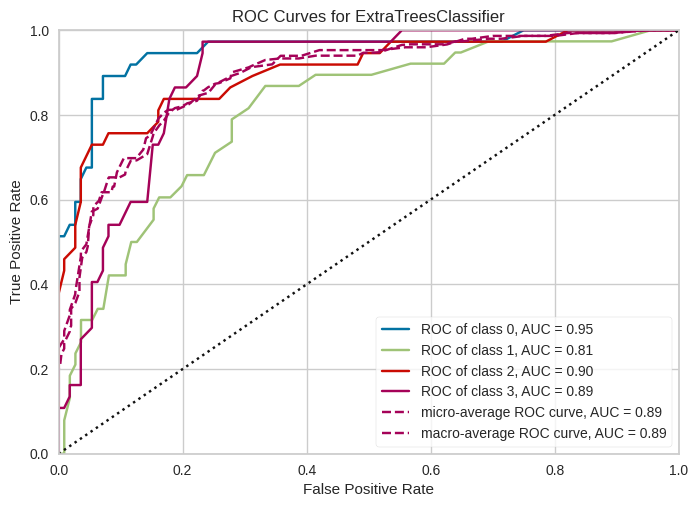

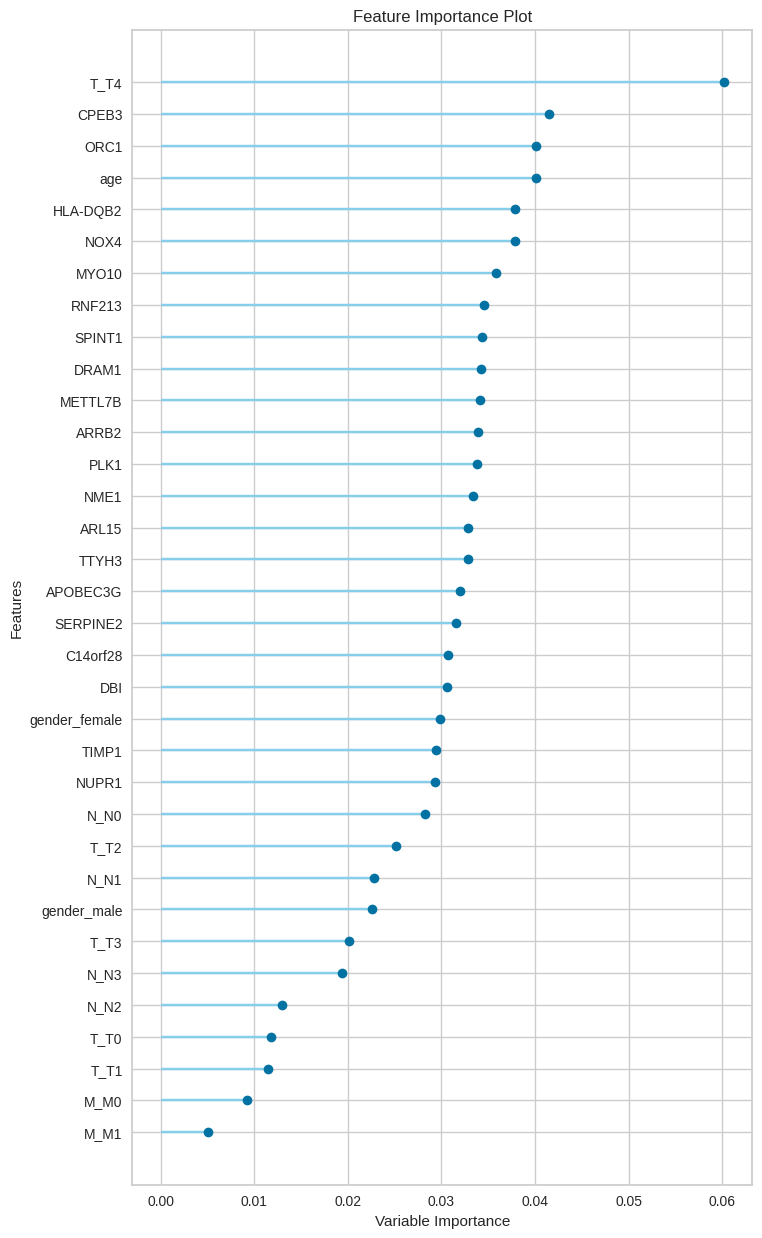

In [ ]:
#@title evaluate beat_model
#evaluate_model(best_model) # all evaluate plots in the line
plot_model(best_model,plot = 'auc')
plot_model(best_model,plot = 'feature_all')

# optimal prognostic model app

In [ ]:
#@title setup and create_app (Need Restart)
try:
    from pycaret.classification import create_app
    print('Please enter the age of integer type; Gene expression after normalization (0-1); In TNM staging, 0: no, 1: yes.')
    app = create_app(best_model)
except ImportError:
    !pip install pycaret[mlops]
    print('Restart to complete the installation!')
    print('Restart to complete the installation!')
    print('Restart to complete the installation!')    

Please enter the age of integer type; Gene expression after normalization (0-1); In TNM staging, 0: no, 1: yes.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>